# Preliminary analysis March 2023

In this notebook a preliminary analysis of the NUTRECON data will be performed. It is divided in the following sections:

*Section 1*

        <Population charachterization>
        sociodemographic data (Age, Sex, BMI, Education)
        Feeding behaviour (PFS, YFAS, DEBQ and QAA)
        psychometrics (BDI, BAI and PANAS)
*Section 2*

        <Hunger, Satiety and flavour ratings>
        Hunger and Satiety 
        analisar a variação do pleasantness: group level, subject level (point-plots, classify subject as decreasers, stable or not), By day
*Section 3*

        <NUTRECON data>
        Tempos de tarefa (Por bloco, entre blocos, total, e por dia)
        parametros de 2nd vs 3o e 1o vs 2nd vs 3o.
        estimar parametros com primeiros blocos vs com todos, etc.

In [63]:
# try to run the code on google colab...
try:
  from google.colab import drive
  drive.mount('/content/drive/')
  shared_drive_foldername = 'NUTRECON'
  root = '/content/drive/Shareddrives/{}/'.format(shared_drive_foldername)
  subject_figures_path = root + "4. Results/2. Group level/"
  !pip install pandas==1.4.2
  print('Running Code in Colab')
# ...or locally
except:
  # define the local directory of the project
#   root = "C:/Users/DiogoMelo/nutreconDrive/"
  root = 'D:/FV/Projects/NUTRECON/nutreconDrive/'
  # define a path to save the the figures from the analysis
#   subject_figures_path = "C:/Users/DiogoMelo/NUTRECON/Results/Group Level/"
  subject_figures_path = "D:/FV/Projects/NUTRECON/Results/Group Level/"
  print('Running Code locally')

# import necessary packages
import pandas as pd
import numpy as np

from datetime import datetime
from glob import glob
import sys
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.optimize import minimize
#from sklearn.linear_model import LogisticRegression
from numpy.core.fromnumeric import resize
from pathlib import Path

# append the folder containing the data acquisition Jupyter Notebooks to the system's path
sys.path.append(root + '1. Acquisition/notebooks')

# import nutrecon.py variables and functions
from nutrecon import *

# variable names and IDs object initiation
_v_ = Vars()

experiment_code = _v_.experiment_code
dataPath = _v_.dataPath
# path for the folders containing the sequence and response files, respectively
sequences_dataPath = _v_.sequences_dataPath
responses_dataPath = _v_.responses_dataPath

# correspondance between flavors tested and single letter code
flavorCodes = _v_.flavorCodes

# correspondance between image number and shape
imageCodes = _v_.imageCodes

# map of indexes to image numbers
imageDecoder = _v_.imageDecoder

# set of file identifiers and column names for dataframes

pres_order_fileID = _v_.pres_order_fileID
pres_order_colName = _v_.pres_order_colName
flavorID_colName = _v_.flavorID_colName
flavorName_colName = _v_.flavorName_colName

pres_order_d2_fileID = _v_.pres_order_d2_fileID
pres_order_d3_fileID = _v_.pres_order_d3_fileID

# these files contain the ratings of intensity, novelty and pleasantness for each of the three days
flav_ratings_fileID = _v_.flav_ratings_fileID

intensity_colName = _v_.intensity_colName
novelty_colName = _v_.novelty_colName
pleasanteness_colName = _v_.pleasanteness_colName

# order of the four selected flavors at day 1 learnig phase
learn_order_fileID = _v_.learn_order_fileID
learningOrder_colName = _v_.learningOrder_colName
imageName_colName = _v_.imageName_colName
imageID_colName = _v_.imageID_colName

# order of flavour presentation during day 1 association test
assocTestOrder1_colName = _v_.assocTestOrder1_colName
assoc1_order_fileID = _v_.assoc1_order_fileID

# order of flavour presentation during day 2 association test
assocTestOrder2_colName = _v_.assocTestOrder2_colName
assoc2_order_fileID = _v_.assoc2_order_fileID

# order of flavour presentation during day 3 association test
assocTestOrder3_colName = _v_.assocTestOrder3_colName
assoc3_order_fileID = _v_.assoc3_order_fileID

neuroEconOrder1_fileID = _v_.neuroEconOrder1_fileID
neuroEconOrder2_fileID = _v_.neuroEconOrder2_fileID

conditioning_order_fileID = _v_.conditioning_order_fileID
conditioning_order_colName = _v_.conditioning_order_colName

ratings_id = _v_.ratings_id
orders_id = _v_.orders_id
neuroEcon_id = _v_.neuroEcon_id



Running Code locally


## 0. Import packages

In [1]:
# try to run the code on google colab...
try:
  from google.colab import drive
  drive.mount('/content/drive/')
  shared_drive_foldername = 'NUTRECON'
  root = '/content/drive/Shareddrives/{}/'.format(shared_drive_foldername)
  subject_figures_path = root + "4. Results/2. Group level/"
  !pip install pandas==1.4.2
  print('Running Code in Colab')
# ...or locally
except:
  # define the local directory of the project
#   root = "C:/Users/DiogoMelo/nutreconDrive/"
  root = 'D:/FV/Projects/NUTRECON/nutreconDrive/'
  # define a path to save the the figures from the analysis
#   subject_figures_path = "C:/Users/DiogoMelo/NUTRECON/Results/Group Level/"
  subject_figures_path = "D:/FV/Projects/NUTRECON/Results/Group Level/"
  print('Running Code locally')

from scipy.optimize import minimize
import numpy as np
import pandas as pd
from glob import glob
import matplotlib.pyplot as plt
import seaborn as sns
import sys
sys.path.append(root + 'python')
from variableCoding import Vars
import importData as load_data
import plots as myPlots

_v_ = Vars()
experiment_code = _v_.experiment_code
responses_dataPath = _v_.responses_dataPath
ratings_id = _v_.ratings_id

subject_code_list = list(set([s.split('\\')[-1].split('_')[0] for s in glob('{}{}*{}*'.format(responses_dataPath, experiment_code, ratings_id))]))

data_folder = responses_dataPath.split('Data')[0] + 'Data/'


Running Code locally
Running Code locally


### Load Data

#### Sociodemographic

In [2]:
# Load sociodemographic, feeding behaviour and psychometrics into DataFrames
# Data is stored in a Google sheets and each sheet corresponds to a scale or sociodemographic data
psychometrics_path = "{}NUTRECON_psychometrics.xlsx".format(data_folder)

psychometrics_dict = pd.read_excel(psychometrics_path, sheet_name=None, index_col=0)
print(list(psychometrics_dict.keys()))

sociodemo_df = psychometrics_dict['sociodemografic']
sociodemo_df = sociodemo_df[['age', 'sex (0/1)', 'education (years)', 
                             'education', 'height', 'weight', 'bmi']]
sociodemo_df.dropna(how='all', inplace = True)
sociodemo_df.reset_index(inplace=True)
sociodemo_df = sociodemo_df.rename(columns={'index': 'sub id'})
sociodemo_df['sex (0/1)'] = sociodemo_df['sex (0/1)'].astype("int").astype("category")
sociodemo_df['education'] = sociodemo_df['education'].astype("category")
sociodemo_df['education (years)'] = sociodemo_df['education (years)'].astype("int")
sociodemo_df.head()

['sociodemografic', 'PFS', 'YFAS', 'DEBQ', 'QAA', 'BDI', 'BAI', 'PANAS', 'Taste-strips', 'Conditioning']


C:\Users\Admin\AppData\Local\Temp\ipykernel_1720\2150866372.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sociodemo_df.dropna(how='all', inplace = True)


,sub id,age,sex (0/1),education (years),education,height,weight,bmi
0,nutre001,22.0,1,15,Licenciatura (freq. mestrado),1.630,58.5,22.018141
1,nutre002,22.0,1,15,Licenciatura (freq. mestrado),1.625,55.3,20.942012
2,nutre003,24.0,1,17,Mestrado,1.695,58.6,20.396620
3,nutre004,22.0,0,17,Mestrado,1.800,78.1,24.104938
4,nutre005,23.0,0,15,Licenciatura,1.770,73.8,23.556449


#### Taste Strips

In [4]:
# Load all Taste Strips Ratings

all_tasteRatings = load_data.tasteStripsRatings(psychometrics_dict, responses_dataPath)

all_tasteRatings

c:\Users\Admin\anaconda3\envs\nutrecon\lib\site-packages\pandas\core\algorithms.py:798: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  uniques = Index(uniques)


,User,Trial,order_id,tastant,intensity,pleasantness,strip_id,strip,identification,intensity_timestamp,pleasantness_timestamp,tastant_timestamp
0,nutre001,1,16.0,3,32,-23,1,sour1,1,NaN,NaN,NaN
1,nutre001,2,16.0,3,53,-42,2,sour2,1,NaN,NaN,NaN
2,nutre001,3,16.0,3,62,-63,3,sour3,1,NaN,NaN,NaN
3,nutre001,4,16.0,3,78,-63,4,sour4,1,NaN,NaN,NaN
4,nutre001,5,16.0,2,12,-3,11,sweet1,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
301,nutre020,14,7.0,0.0,0.0,0.0,5,water,1,1.678275e+09,1.678275e+09,1.678275e+09
302,nutre020,15,7.0,2.0,18.0,-6.0,15,bitter1,1,1.678275e+09,1.678275e+09,1.678275e+09
303,nutre020,16,7.0,2.0,29.0,-10.0,16,bitter2,1,1.678275e+09,1.678275e+09,1.678275e+09
304,nutre020,17,7.0,2.0,53.0,-27.0,17,bitter3,1,1.678275e+09,1.678275e+09,1.678275e+09


#### Flavor ratings

In [10]:
# Load all Flavor Ratings
allRatings_df = load_data.flavorRatings(subject_code_list, responses_dataPath).drop_duplicates()
allRatings_df.sort_values(by='User')

,Day,Trial,User,intensity,intensity_timestamp,novelty,novelty_timestamp,pleasantness,pleasantness_timestamp,Flavor,flavor_id
1,2,2,nutre001,7,1669371417,17,1669371405,6,1669371428,pomegranate,e
1,3,2,nutre001,12,1669800804,0,1669800793,37,1669800818,pomegranate,e
0,3,1,nutre001,11,1669800764,0,1669800749,-6,1669800773,cashew,c
1,1,2,nutre001,9,1669283538,3,1669283523,17,1669283549,dragon fruit,h
2,1,3,nutre001,26,1669283595,27,1669283578,-12,1669283603,grapefruit,j
...,...,...,...,...,...,...,...,...,...,...,...
7,1,8,nutre020,53,1677750213,31,1677750204,30,1677750218,lychee,d
0,2,1,nutre020,44,1677835568,41,1677835558,44,1677835574,cashew,c
1,2,2,nutre020,53,1677835611,47,1677835597,39,1677835624,licorice,k
1,3,2,nutre020,46,1678267585,20,1678267581,36,1678267593,cashew,c


#### NUTRECON trials

In [11]:
# Load NUTRECON trials and get flavor_calorie association
all_neuroEcon_df = load_data.nutreconTrials(subject_code_list, responses_dataPath).drop_duplicates()
calorieCodes_df = load_data.get_conditionedFlavor(all_neuroEcon_df).drop_duplicates()

# all_neuroEcon_df.to_csv("C:/Users/Admin/Downloads/NUTRECON_dataset_10032023.csv", index= None)

## 1. Population Characterisation 

In [12]:
sociodemo_df.describe()

,age,education (years),height,weight,bmi
count,20.000000,20.000000,20.000000,20.000000,20.000000
mean,22.050000,14.400000,1.717150,65.325000,22.088115
std,2.163696,1.759186,0.094934,9.833663,2.205044
min,18.000000,12.000000,1.590000,49.500000,18.688000
25%,21.750000,12.000000,1.630000,58.375000,20.511570
50%,22.000000,15.000000,1.711500,64.500000,21.781314
75%,23.000000,15.000000,1.788750,73.825000,23.693572
max,27.000000,17.000000,1.875000,85.800000,26.928418


In [13]:
sociodemo_df.describe(include=['category'])

,sex (0/1),education
count,20,20
unique,2,5
top,0,Licenciatura (freq. mestrado)
freq,11,8


Text(0.5, 1.0, 'Age Distribution\n(incluision criteria 18-65)')

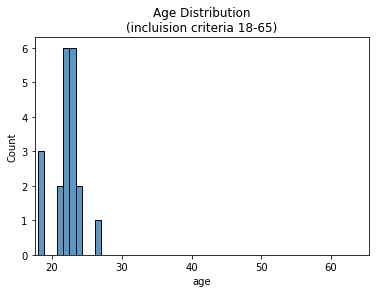

In [14]:
# Plot Age Distribution

# Figure 1.1 - Age, Age by Gender, Age by Education
fig1, axis = plt.subplots()
sns.histplot(sociodemo_df, x = 'age', ax = axis)
# sns.boxplot(x = sociodemo_df['sex (0/1)'], y = sociodemo_df['age'], ax = axis[1])
# sns.boxplot(x = sociodemo_df['education'], y = sociodemo_df['age'], hue = sociodemo_df['sex (0/1)'], ax = axis[2])

axis.set_xlim([17.5, 65.5])
# Boxplot of Age by Gender where markers are Education level
axis.set_title('Age Distribution\n(incluision criteria 18-65)')

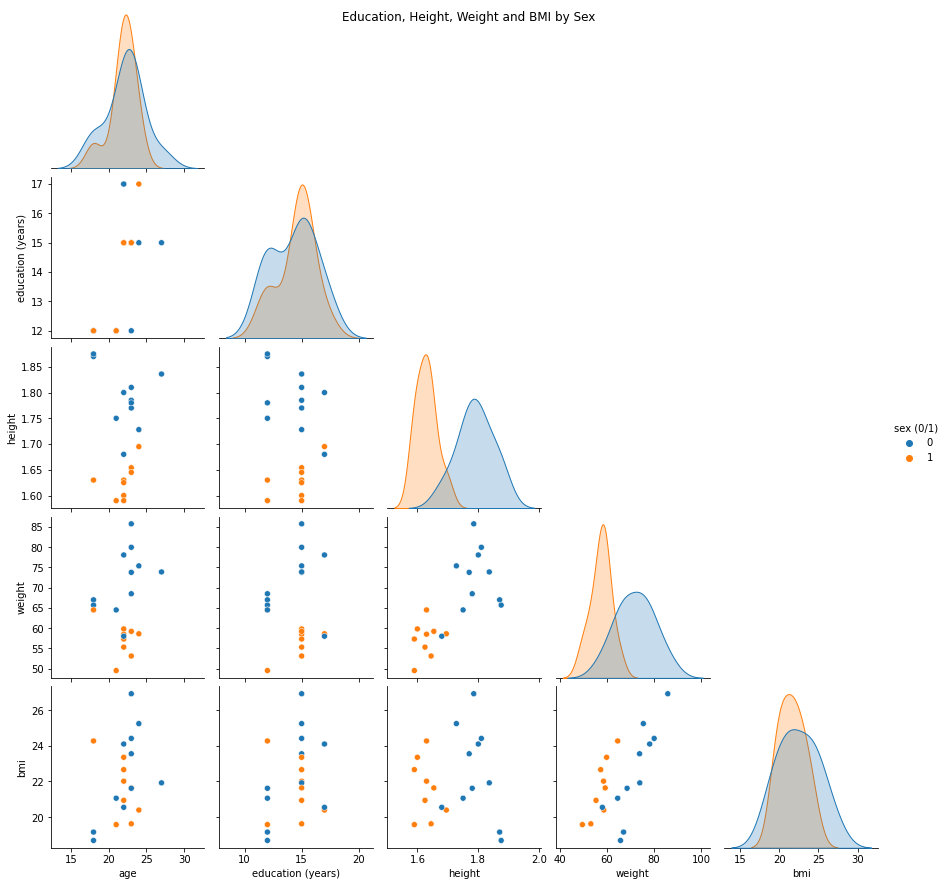

In [15]:
# Plot All variables distribution by Sex
g = sns.pairplot(sociodemo_df, hue = 'sex (0/1)', corner=True)
g.fig.suptitle('Education, Height, Weight and BMI by Sex');

## 2. Hunger, Satiety and Flavour Ratings

minimal amount of flavors that can be considered to move one without losing subject?
3D plot of Ratings classified by Task performance () -> logistic regression



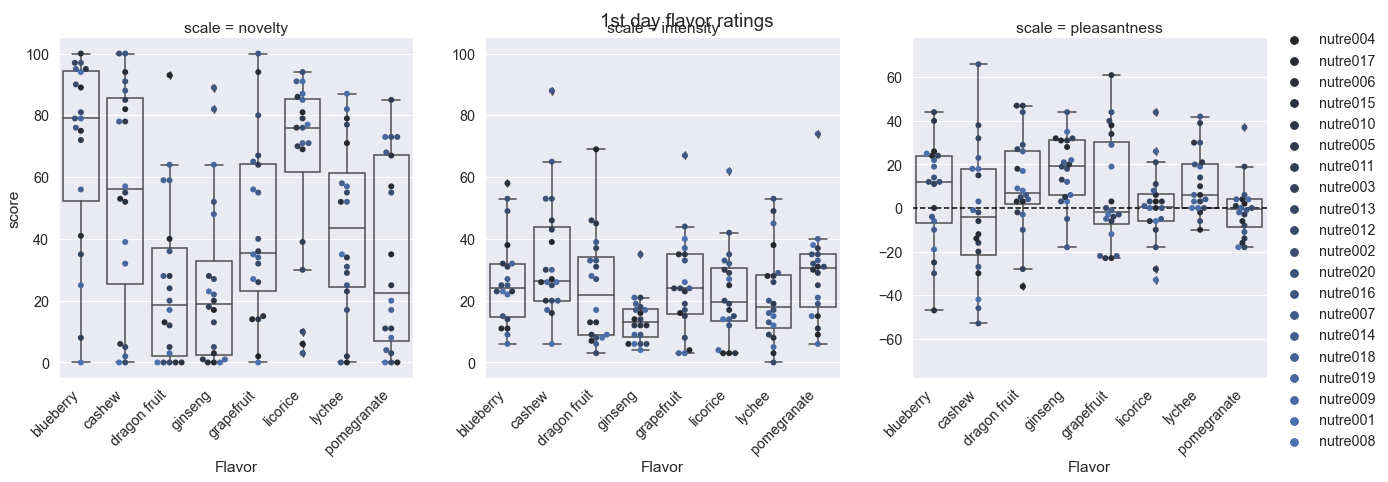

In [16]:
g = myPlots.day1_flavorRatings(allRatings_df)

g.fig.suptitle('1st day flavor ratings');

In [21]:
first_subs = ['nutre001',
            'nutre002',
            'nutre003',
            'nutre004',
            'nutre005',
            'nutre006',
            'nutre007',
            'nutre008']

ratings_and_calorie_df = allRatings_df[['User', 'Day', _v_.novelty_colName, _v_.intensity_colName, _v_.pleasanteness_colName, _v_.flavorName_colName]].merge(calorieCodes_df, 
    left_on=['User', _v_.flavorName_colName], right_on=['sub_id', _v_.flavorName_colName])

ratings_and_calorie_df = ratings_and_calorie_df[~ratings_and_calorie_df['User'].isin(first_subs)]
print(sorted(list(ratings_and_calorie_df['User'].unique())))
ratings_and_calorie_df.head()

['nutre009', 'nutre010', 'nutre011', 'nutre012', 'nutre013', 'nutre014', 'nutre015', 'nutre016', 'nutre017', 'nutre018', 'nutre019', 'nutre020']


,User,Day,novelty,intensity,pleasantness,Flavor,sub_id,shape,calorie
6,nutre017,1,0,15,4,pomegranate,nutre017,square,C-
7,nutre017,2,0,21,-20,pomegranate,nutre017,square,C-
8,nutre017,3,0,26,-27,pomegranate,nutre017,square,C-
9,nutre017,1,0,14,31,ginseng,nutre017,cross,C+
10,nutre017,2,0,17,54,ginseng,nutre017,cross,C+


In [22]:
ratings_and_calorie_df_ = ratings_and_calorie_df.drop(columns = ['sub_id','novelty', 'intensity', 'shape', ])
ratings_and_calorie_df_.columns

Index(['User', 'Day', 'pleasantness', 'Flavor', 'calorie'], dtype='object')

In [86]:
cplus_df = ratings_and_calorie_df_[ratings_and_calorie_df_['calorie'] == 'C+'].reset_index(drop = True)
cminus_df = ratings_and_calorie_df_[ratings_and_calorie_df_['calorie'] == 'C-'].reset_index(drop = True)

cplus_df.merge(cminus_df, left_on = ['User', 'Day', 'Flavor',], right_on = ['User', 'Day', 'Flavor',])

,User,Day,pleasantness_x,Flavor,calorie_x,pleasantness_y,calorie_y


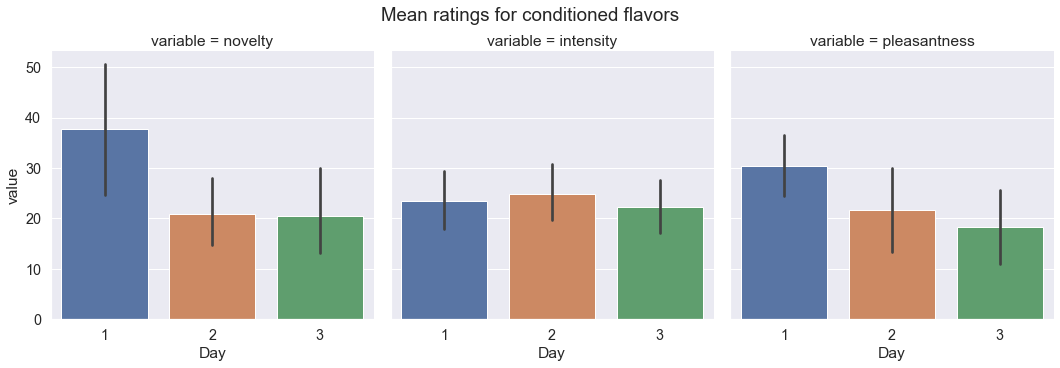

In [23]:
ratings_and_calorie_longdf = ratings_and_calorie_df.drop(columns=['sub_id'] ).melt(
                    id_vars = ['User', 'shape', _v_.flavorName_colName, 'calorie', 'Day']
)
ratings_and_calorie_longdf

g = sns.catplot(
    data=ratings_and_calorie_longdf, x="Day", y="value", col = 'variable',
    kind="bar")

g.fig.suptitle('Mean ratings for conditioned flavors', va = 'bottom');

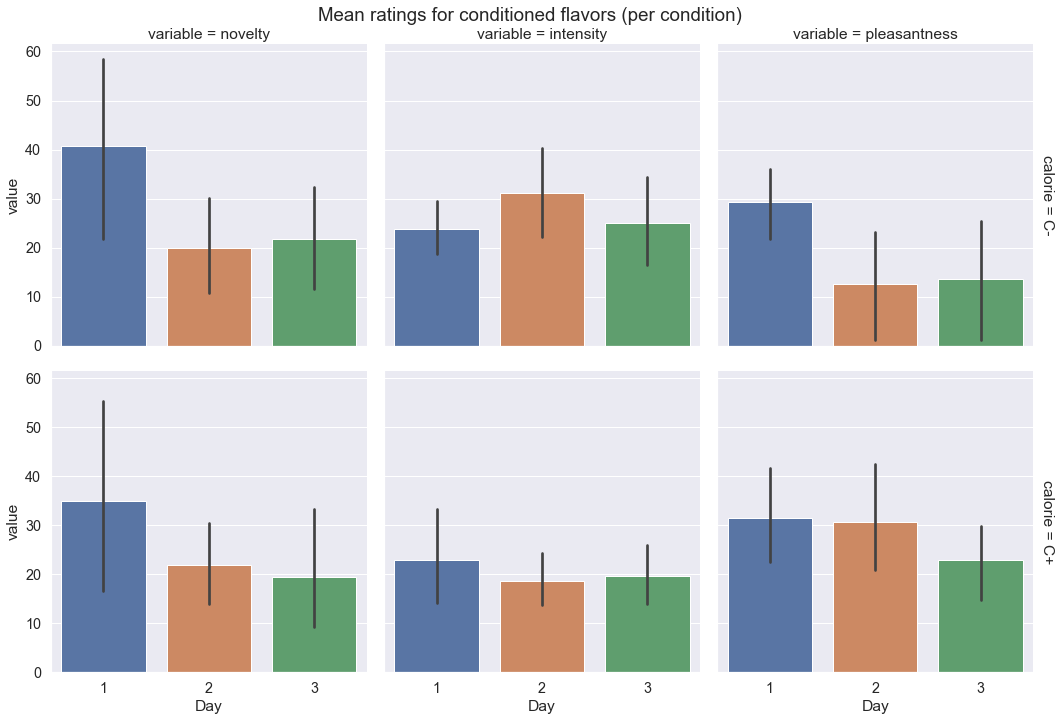

In [24]:
g = sns.catplot(
    data=ratings_and_calorie_longdf, x="Day", y="value", col = 'variable',
    kind="bar", row = 'calorie', margin_titles = True)

g.fig.suptitle('Mean ratings for conditioned flavors (per condition)', va = 'bottom');

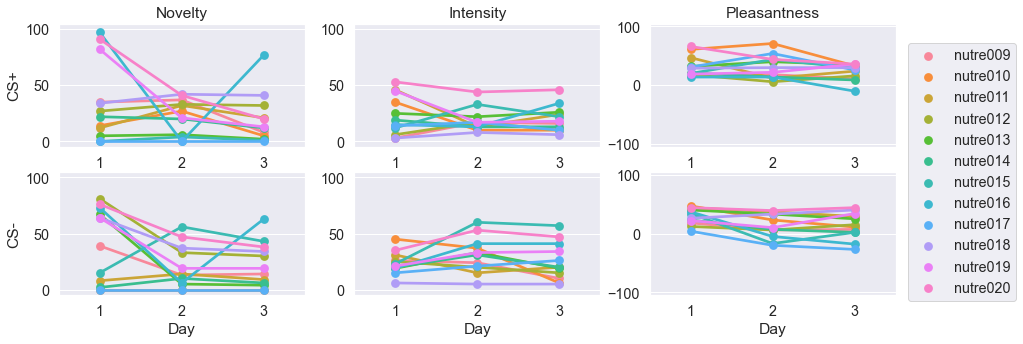

In [26]:
fig, ax = plt.subplots(ncols = 3, nrows=2, figsize = [15,5])

cPlus_ratings = ratings_and_calorie_df[ratings_and_calorie_df['calorie'] == 'C+']
cMinus_ratings = ratings_and_calorie_df[ratings_and_calorie_df['calorie'] == 'C-']
sns.pointplot(data = cPlus_ratings, x = 'Day', y = _v_.novelty_colName, hue = 'User', hue_order= sorted(list(ratings_and_calorie_df['User'].unique())),
              order = [1,2,3], ax = ax[0,0])
ax[0,0].set_ylim([-5,105]);
ax[0,0].get_legend().remove();
ax[0,0].set_title('Novelty')
ax[0,0].set_ylabel('CS+')
sns.pointplot(data = cPlus_ratings, x = 'Day', y = _v_.intensity_colName, hue = 'User', hue_order= sorted(list(ratings_and_calorie_df['User'].unique())),
              order = [1,2,3], ax = ax[0,1])
ax[0,1].set_ylim([-5,105]);
ax[0,1].set_ylabel('')
ax[0,1].set_title('Intensity')
ax[0,1].get_legend().remove();
sns.pointplot(data = cPlus_ratings, x = 'Day', y = _v_.pleasanteness_colName, hue = 'User', hue_order= sorted(list(ratings_and_calorie_df['User'].unique())),
              order = [1,2,3], ax = ax[0,2])
ax[0,2].set_ylim([-105,105]);
ax[0,2].set_ylabel('')
ax[0,2].set_title('Pleasantness')
ax[0,2].get_legend().remove();

sns.pointplot(data = cMinus_ratings, x = 'Day', y = _v_.novelty_colName, hue = 'User', hue_order= sorted(list(ratings_and_calorie_df['User'].unique())),
              order = [1,2,3], ax = ax[1,0])
ax[1,0].set_ylim([-5,105]);
ax[1,0].get_legend().remove();
ax[1,0].set_title('')
ax[1,0].set_ylabel('CS-')
sns.pointplot(data = cMinus_ratings, x = 'Day', y = _v_.intensity_colName, hue = 'User', hue_order= sorted(list(ratings_and_calorie_df['User'].unique())),
              order = [1,2,3], ax = ax[1,1]) 
ax[1,1].set_ylim([-5,105]);
ax[1,1].set_ylabel('')
ax[1,1].set_title('')
ax[1,1].get_legend().remove();
sns.pointplot(data = cMinus_ratings, x = 'Day', y = _v_.pleasanteness_colName, hue = 'User', hue_order= sorted(list(ratings_and_calorie_df['User'].unique())),
              order = [1,2,3], ax = ax[1,2])
ax[1,2].set_ylim([-105,105]);
ax[1,2].set_ylabel('')
ax[1,2].set_title('')
ax[1,2].get_legend().remove();

plt.legend(bbox_to_anchor=(1.05, 1), loc=6, borderaxespad=0.)

In [29]:
calorieCodes_df.drop_duplicates()

,sub_id,Flavor,shape,calorie
0,nutre001,pomegranate,square,C+
1,nutre001,cashew,hexagon,C-
2,nutre002,grapefruit,cross,C+
3,nutre002,pomegranate,hexagon,C-
4,nutre003,ginseng,cross,C+
5,nutre003,cashew,square,C-
6,nutre004,blueberry,square,C+
7,nutre004,grapefruit,cross,C-
8,nutre005,lychee,circle,C+
9,nutre005,ginseng,hexagon,C-


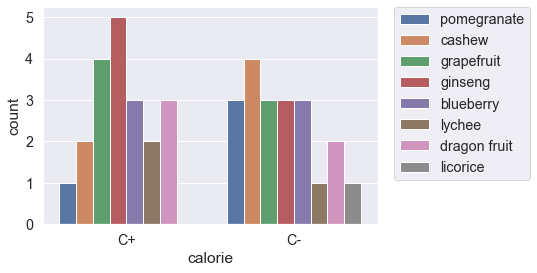

In [30]:
sns.countplot(data = calorieCodes_df, x= 'calorie', hue='Flavor')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

In [31]:
ratings_and_calorie_wide_df = ratings_and_calorie_df.drop(columns=['sub_id'] ).pivot_table(
            index = ['User', 'shape', 'calorie', _v_.flavorName_colName],
            columns = ['Day'],
            values =  [_v_.novelty_colName, _v_.intensity_colName, _v_.pleasanteness_colName])

ratings_and_calorie_wide_df.head()

intensity         novelty          \
Day                                           1   2   3       1   2   3   
User     shape   calorie Flavor                                           
nutre009 cross   C+      grapefruit           3  17  16      35  37   8   
         square  C-      cashew              26  24  10      39  13  14   
nutre010 hexagon C+      grapefruit          35  10  10      14  27   5   
         square  C-      dragon fruit        45  37   6       0   0   0   
nutre011 cross   C+      dragon fruit        46  13  24      12  32  21   

                                      pleasantness          
Day                                              1   2   3  
User     shape   calorie Flavor                             
nutre009 cross   C+      grapefruit             19  18  11  
         square  C-      cashew                 18   6   7  
nutre010 hexagon C+      grapefruit             61  71  33  
         square  C-      dragon fruit           47  23  11  
nutre011 cross   C+      dragon fruit           47  12  24

In [32]:
flavorRatingsDiff_df = pd.DataFrame()

flavorRatingsDiff_df['pleasantness Day 2 - Day 1'] = ratings_and_calorie_wide_df[(_v_.pleasanteness_colName, 2)] - ratings_and_calorie_wide_df[(_v_.pleasanteness_colName, 1)]
flavorRatingsDiff_df['pleasantness Day 3 - Day 1'] = ratings_and_calorie_wide_df[(_v_.pleasanteness_colName, 3)] - ratings_and_calorie_wide_df[(_v_.pleasanteness_colName, 1)]
flavorRatingsDiff_df['pleasantness Day 3 - Day 2'] = ratings_and_calorie_wide_df[(_v_.pleasanteness_colName, 3)] - ratings_and_calorie_wide_df[(_v_.pleasanteness_colName, 2)]

flavorRatingsDiff_df['novelty Day 2 - Day 1'] = ratings_and_calorie_wide_df[(_v_.novelty_colName, 2)] - ratings_and_calorie_wide_df[(_v_.novelty_colName, 1)]
flavorRatingsDiff_df['novelty Day 3 - Day 1'] = ratings_and_calorie_wide_df[(_v_.novelty_colName, 3)] - ratings_and_calorie_wide_df[(_v_.novelty_colName, 1)]
flavorRatingsDiff_df['novelty Day 3 - Day 2'] = ratings_and_calorie_wide_df[(_v_.novelty_colName, 3)] - ratings_and_calorie_wide_df[(_v_.novelty_colName, 2)]

flavorRatingsDiff_df['intensity Day 2 - Day 1'] = ratings_and_calorie_wide_df[(_v_.intensity_colName, 2)] - ratings_and_calorie_wide_df[(_v_.intensity_colName, 1)]
flavorRatingsDiff_df['intensity Day 3 - Day 1'] = ratings_and_calorie_wide_df[(_v_.intensity_colName, 3)] - ratings_and_calorie_wide_df[(_v_.intensity_colName, 1)]
flavorRatingsDiff_df['intensity Day 3 - Day 2'] = ratings_and_calorie_wide_df[(_v_.intensity_colName, 3)] - ratings_and_calorie_wide_df[(_v_.intensity_colName, 2)]

flavorRatingsDiff_df.head()

pleasantness Day 2 - Day 1  \
User     shape   calorie Flavor                                     
nutre009 cross   C+      grapefruit                            -1   
         square  C-      cashew                               -12   
nutre010 hexagon C+      grapefruit                            10   
         square  C-      dragon fruit                         -24   
nutre011 cross   C+      dragon fruit                         -35   

                                       pleasantness Day 3 - Day 1  \
User     shape   calorie Flavor                                     
nutre009 cross   C+      grapefruit                            -8   
         square  C-      cashew                               -11   
nutre010 hexagon C+      grapefruit                           -28   
         square  C-      dragon fruit                         -36   
nutre011 cross   C+      dragon fruit                         -23   

                                       pleasantness Day 3 - Day 2  \
User     shape   calorie Flavor                                     
nutre009 cross   C+      grapefruit                            -7   
         square  C-      cashew                                 1   
nutre010 hexagon C+      grapefruit                           -38   
         square  C-      dragon fruit                         -12   
nutre011 cross   C+      dragon fruit                          12   

                                       novelty Day 2 - Day 1  \
User     shape   calorie Flavor                                
nutre009 cross   C+      grapefruit                        2   
         square  C-      cashew                          -26   
nutre010 hexagon C+      grapefruit                       13   
         square  C-      dragon fruit                      0   
nutre011 cross   C+      dragon fruit                     20   

                                       novelty Day 3 - Day 1  \
User     shape   calorie Flavor                                
nutre009 cross   C+      grapefruit                      -27   
         square  C-      cashew                          -25   
nutre010 hexagon C+      grapefruit                       -9   
         square  C-      dragon fruit                      0   
nutre011 cross   C+      dragon fruit                      9   

                                       novelty Day 3 - Day 2  \
User     shape   calorie Flavor                                
nutre009 cross   C+      grapefruit                      -29   
         square  C-      cashew                            1   
nutre010 hexagon C+      grapefruit                      -22   
         square  C-      dragon fruit                      0   
nutre011 cross   C+      dragon fruit                    -11   

                                       intensity Day 2 - Day 1  \
User     shape   calorie Flavor                                  
nutre009 cross   C+      grapefruit                         14   
         square  C-      cashew                             -2   
nutre010 hexagon C+      grapefruit                        -25   
         square  C-      dragon fruit                       -8   
nutre011 cross   C+      dragon fruit                      -33   

                                       intensity Day 3 - Day 1  \
User     shape   calorie Flavor                                  
nutre009 cross   C+      grapefruit                         13   
         square  C-      cashew                            -16   
nutre010 hexagon C+      grapefruit                        -25   
         square  C-      dragon fruit                      -39   
nutre011 cross   C+      dragon fruit                      -22   

                                       intensity Day 3 - Day 2  
User     shape   calorie Flavor                                 
nutre009 cross   C+      grapefruit                         -1  
         square  C-      cashew                            -14  
nutre010 hexagon C+      grapefruit                   

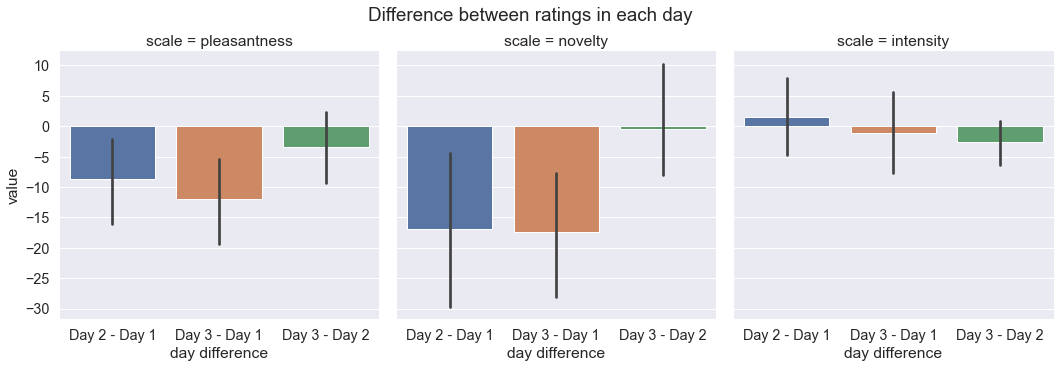

In [33]:
df = flavorRatingsDiff_df.reset_index().drop(columns = ['shape', _v_.flavorName_colName]).melt(id_vars = ['User', 'calorie'])
df['scale'] = df['variable'].apply(lambda x: x.split(' ',1)[0])
df['day difference'] = df['variable'].apply(lambda x: x.split(' ',1)[1])
df = df.drop(columns='variable')

g = sns.catplot(
    data=df, x="day difference", y="value", col = 'scale',
    kind="bar")

g.fig.suptitle('Difference between ratings in each day', va = 'bottom');

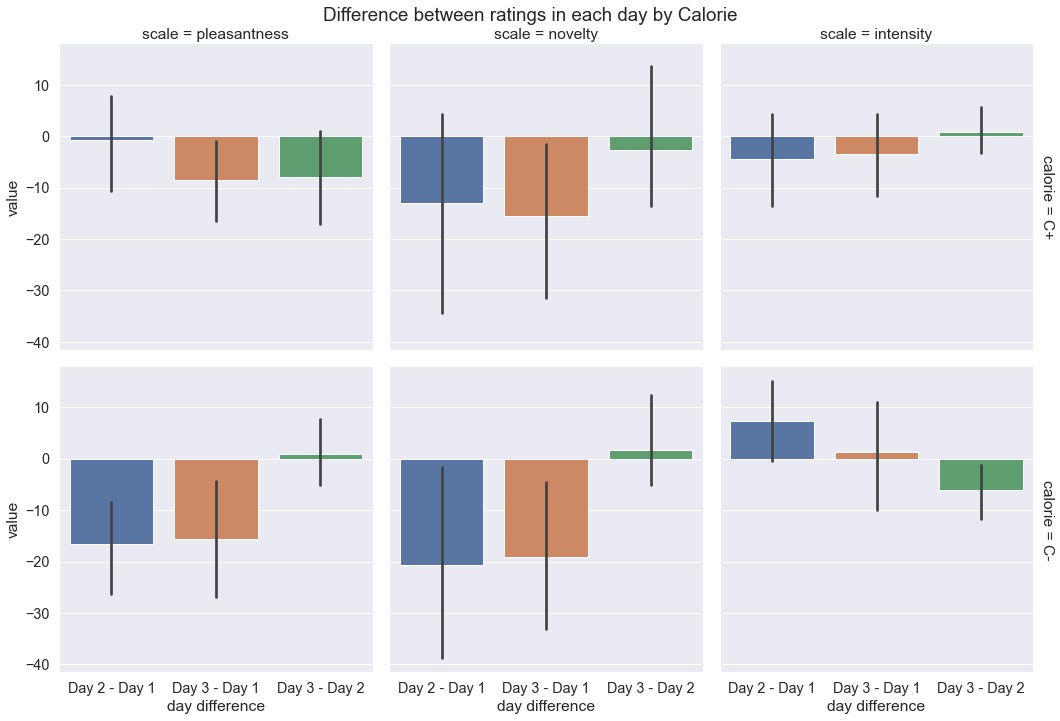

In [34]:
g = sns.catplot(
    data=df, x="day difference", y="value", col = 'scale',
    kind="bar", row = 'calorie', margin_titles = True)

g.fig.suptitle('Difference between ratings in each day by Calorie', va = 'bottom');


## 3. NUTRECON

In [104]:
all_neuroEcon_df.head()

,Day,Trial,Trial ID,Trial Type,User,block,choice,choiceStart_ms,choiceTime,choiceTime_ms,...,lottery shape,lottery type,optionTime,reference flavor,reference p,reference qt,reference shape,reference type,trialStartTimestamp,trialStart_ms
0,day2,1,21,same,nutre001,0,2,49313,2250,50147,...,,money,2000,,1.0,1.0,,money,1669375559,47371
1,day2,2,50,same,nutre001,0,2,52917,2250,54018,...,hexagon,C-,2000,cashew,1.0,20.0,hexagon,C-,1669375563,51034
2,day2,3,18,same,nutre001,0,2,56771,2250,57055,...,,money,2000,,1.0,1.0,,money,1669375567,54891
3,day2,4,71,same,nutre001,0,1,59808,2250,60876,...,hexagon,C-,2000,cashew,1.0,20.0,hexagon,C-,1669375570,57937
4,day2,5,36,same,nutre001,0,1,63662,2250,64280,...,square,C+,2000,pomegranate,1.0,20.0,square,C+,1669375574,61796


#### Task 

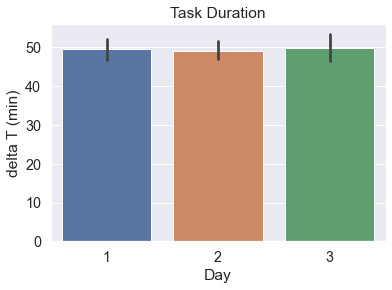

In [35]:
def get_duration(group):
    return ((group['choiceTime_ms'].max() - group['choiceStart_ms'].min() - 1250)/ 1000)/60


task_time_per_Day_df = all_neuroEcon_df.groupby(['Day','User']).apply(get_duration).reset_index().rename(columns = {0:'delta T (min)'})
task_time_per_block_df = all_neuroEcon_df.groupby(['Day','User','block']).apply(get_duration).reset_index().rename(columns = {0:'delta T (min)'})

sns.barplot(data = task_time_per_Day_df, x = 'Day', y = 'delta T (min)')
plt.title('Task Duration');

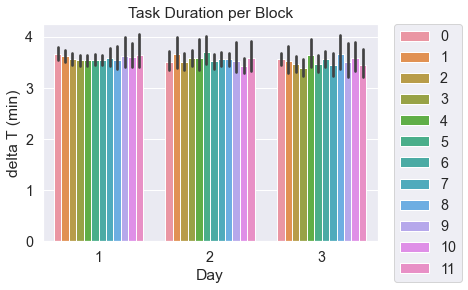

In [36]:
sns.barplot(data = task_time_per_block_df, x = 'Day', y = 'delta T (min)', hue = 'block')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title('Task Duration per Block');

In [37]:
task_time_per_Day_df.describe()

,Day,delta T (min)
count,52.000000,52.000000
mean,2.153846,49.463885
std,0.776736,6.236461
min,1.000000,40.673233
25%,2.000000,45.478183
50%,2.000000,48.547700
75%,3.000000,51.299696
max,3.000000,66.341017


In [38]:
task_time_per_block_df.describe()

,Day,block,delta T (min)
count,624.000000,624.000000,624.000000
mean,2.153846,5.500000,3.547030
std,0.769848,3.454822,0.503106
min,1.000000,0.000000,2.634300
25%,2.000000,2.750000,3.282133
50%,2.000000,5.500000,3.459242
75%,3.000000,8.250000,3.715967
max,3.000000,11.000000,6.398183


In [44]:
probLotteryChoice_colName = 'Prob. of choosing lottery'

def get_reward_choice(row):
  if row['choice'] == 1:
    reward = row['reference type']
  elif row['choice'] == 2:
    reward = row['lottery type']
  else:
    reward = ''

  return reward

def get_choice_side(row):
  if row['choice'] == 1:
    reward = 'reference'
  elif row['choice'] == 2:
    reward = 'lottery'
  else:
    reward = ''
  return reward

def get_probLottery(group):
  prob_lotteryChoice = len(group[group['choice'] == 2]) / 6
  return prob_lotteryChoice


all_neuroEcon_df['chosen reward'] = all_neuroEcon_df.apply(
                lambda row: get_reward_choice(row), axis = 1)
all_neuroEcon_df['chosen option'] = all_neuroEcon_df.apply(
                lambda row: get_choice_side(row), axis = 1)


neuroEcon_choiceCount_df = pd.DataFrame(all_neuroEcon_df.groupby(
            ['User','Day', 'Trial Type', 
             'reference type', 'reference qt', 'reference p', 
             'lottery type', 'lottery p', 'lottery qt']).apply(
        lambda df: get_probLottery(df)), 
        columns = [probLotteryChoice_colName]).reset_index()

In [47]:
neuroEcon_choiceCount_df['lottery type'].unique()

array(['C+', 'C-', 'money'], dtype=object)

In [ ]:
trial_type = 'same'
lottery_type = 'C+'

df = neuroEcon_choiceCount_df[
        (neuroEcon_choiceCount_df['Trial Type'] == trial_type) 
        &
        (neuroEcon_choiceCount_df['lottery type'] == lottery_type)]

df = df[~df['User'].isin(exluded_subjects)]

fg = sns.catplot(data= df, col = 'lottery p', row ="Day", 
    x="lottery qt", y=probLotteryChoice_colName, hue="User", 
    hue_order=sorted(list(df['User'].unique())),
    kind = 'point', # palette = sns.color_palette("crest"),
    height=3, aspect = 1,
    sharex=False, margin_titles = True
    )

fg.fig.suptitle('Same type trials (CS+)', va = 'bottom');

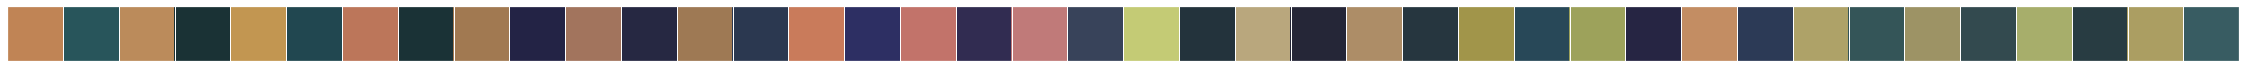

In [134]:
import random

def random_color_palette(n):
    colors = []
    for i in range(n):
        # Generate a random RGB color tuple
        color1 = (random.randint(0, 255)/255, random.randint(0, 255)/255, random.randint(0, 255)/255)
        
        colors.append(color1)

    hex_palette = [mcolors.to_hex(color) for color in colors]
    return colors


def random_paired_color_palette(n_pairs):
    colors = []
    for i in range(n_pairs):
        # Generate a random RGB color tuple
        color1 = (random.randint(0,255), random.randint(0, 255), random.randint(0, 255))
        
        # Generate a random offset for each color component for the second color
        offset = random.randint(-30, 30)
        r2 = color1[0] + offset
        g2 = color1[1] + offset
        b2 = color1[2] + offset
        # Make sure the second color is still within the valid RGB range (0-255)
        r2 = max(min(r2, 255), 0)/255
        g2 = max(min(g2, 255), 0)/255
        b2 = max(min(b2, 255), 0)/255
        color2 = (r2, g2, b2)
        # Append the color pair to the list of colors
        colors.append((color1[0]/255, color1[1]/255, color1[2]/255))
        colors.append(color2)

    hex_palette = [mcolors.to_hex(color) for color in colors]
    return colors

def cool_warm_palette(n_subs):
    # Generate n pairs of colors
    colors = []
    for i in range(n_subs):

        saturation_cool = random.uniform(0.2, 0.4)
        lightness = random.uniform(0.3, 0.6)
        
        hue_cool = random.uniform(0.5, 0.7) # Cool colors have hue between 0.45 and 0.75
        
        cool_color = mcolors.hsv_to_rgb((hue_cool, lightness, saturation_cool))

        hue_warm = random.choice([random.uniform(0, .2)]) # Warm colors have hue between 0 and 0.2, and between 0.8 and 1
        saturation_warm = random.uniform(0.6, 0.8)

        warm_color = mcolors.hsv_to_rgb((hue_warm, lightness, saturation_warm))

        # Append the color pair to the list of colors
        colors.append(warm_color)
        colors.append(cool_color)
    
    hex_palette = [mcolors.to_hex(color) for color in colors]
    return hex_palette

palette  = random_color_palette(25)
coolWarm_palette = cool_warm_palette(20)
sns.palplot(coolWarm_palette)

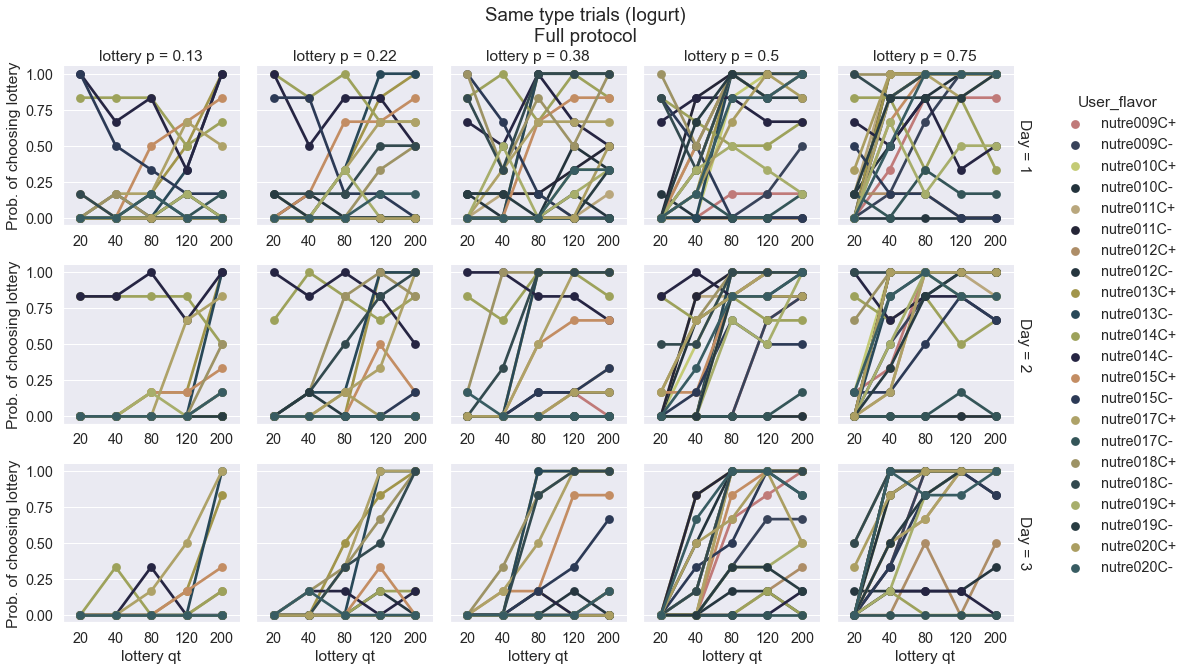

In [152]:
exluded_subjects = ['nutre001', 'nutre002', 'nutre003', 'nutre004', 'nutre005',
       'nutre006', 'nutre007', 'nutre008','nutre016'] 

trial_type = 'same'

df = neuroEcon_choiceCount_df[
        (neuroEcon_choiceCount_df['Trial Type'] == trial_type) 
        &
        (neuroEcon_choiceCount_df['lottery type'] != 'money')]

df = df[~df['User'].isin(exluded_subjects)]

df['User_flavor'] = df['User'] + df['lottery type']

fg = sns.catplot(data= df, col = 'lottery p', row ="Day", 
    x="lottery qt", y=probLotteryChoice_colName, hue="User_flavor", 
    hue_order=sorted(list(df['User_flavor'].unique())),
    kind = 'point', palette = coolWarm_palette[2 * len(exluded_subjects):],
    height=3, aspect = 1,
    sharex=False, margin_titles = True
    )

fg.fig.suptitle('Same type trials (Iogurt)\nFull protocol', va = 'bottom');


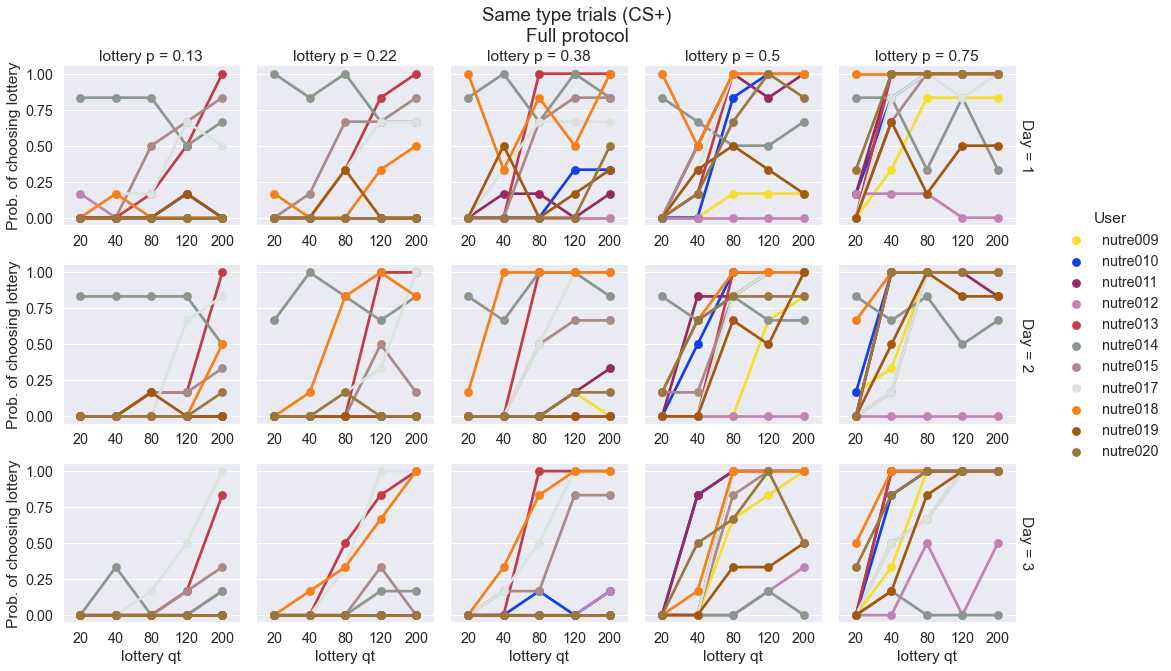

In [153]:
exluded_subjects = ['nutre001', 'nutre002', 'nutre003', 'nutre004', 'nutre005',
       'nutre006', 'nutre007', 'nutre008','nutre016'] 

trial_type = 'same'
lottery_type = 'C+'

df = neuroEcon_choiceCount_df[
        (neuroEcon_choiceCount_df['Trial Type'] == trial_type) 
        &
        (neuroEcon_choiceCount_df['lottery type'] == lottery_type)]

df = df[~df['User'].isin(exluded_subjects)]

fg = sns.catplot(data= df, col = 'lottery p', row ="Day", 
    x="lottery qt", y=probLotteryChoice_colName, hue="User", 
    hue_order=sorted(list(df['User'].unique())),
    kind = 'point', palette = palette[8:],
    height=3, aspect = 1,
    sharex=False, margin_titles = True
    )

fg.fig.suptitle('Same type trials (CS+)\nFull protocol', va = 'bottom');

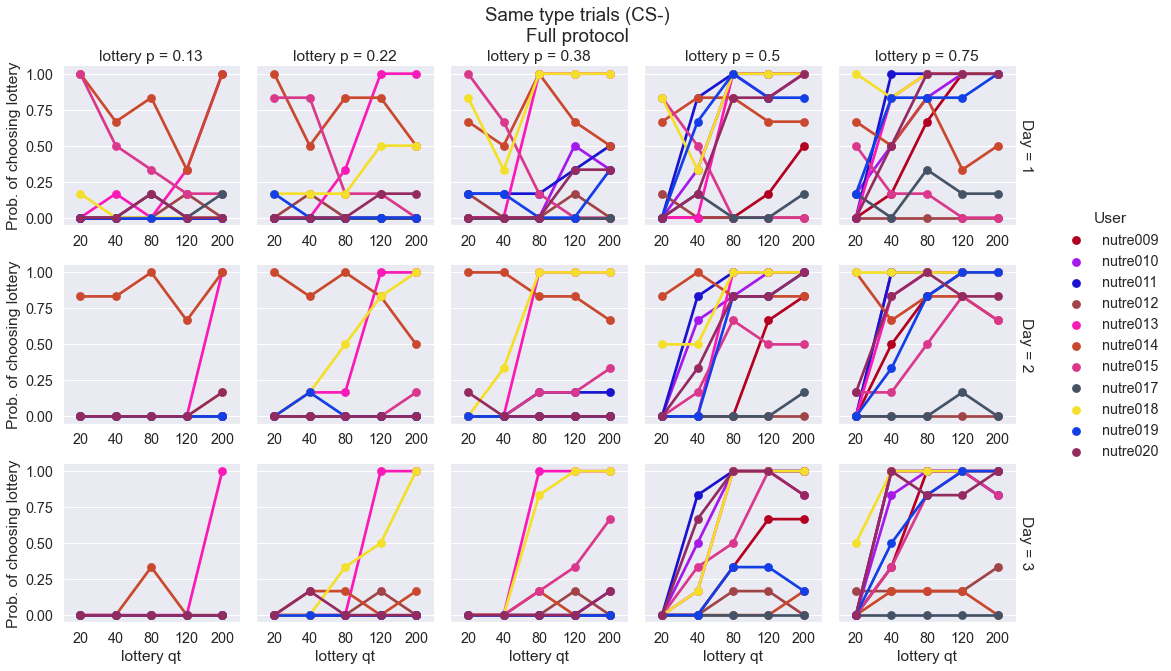

In [154]:
exluded_subjects = ['nutre001', 'nutre002', 'nutre003', 'nutre004', 'nutre005',
       'nutre006', 'nutre007', 'nutre008','nutre016'] 

trial_type = 'same'
lottery_type = 'C-'

df = neuroEcon_choiceCount_df[
        (neuroEcon_choiceCount_df['Trial Type'] == trial_type) 
        &
        (neuroEcon_choiceCount_df['lottery type'] == lottery_type)]

df = df[~df['User'].isin(exluded_subjects)]

fg = sns.catplot(data= df, col = 'lottery p', row ="Day", 
    x="lottery qt", y=probLotteryChoice_colName, hue="User", 
    hue_order=sorted(list(df['User'].unique())),
    kind = 'point', palette = palette,
    height=3, aspect = 1,
    sharex=False, margin_titles = True
    )

fg.fig.suptitle('Same type trials (CS-)\nFull protocol', va = 'bottom');

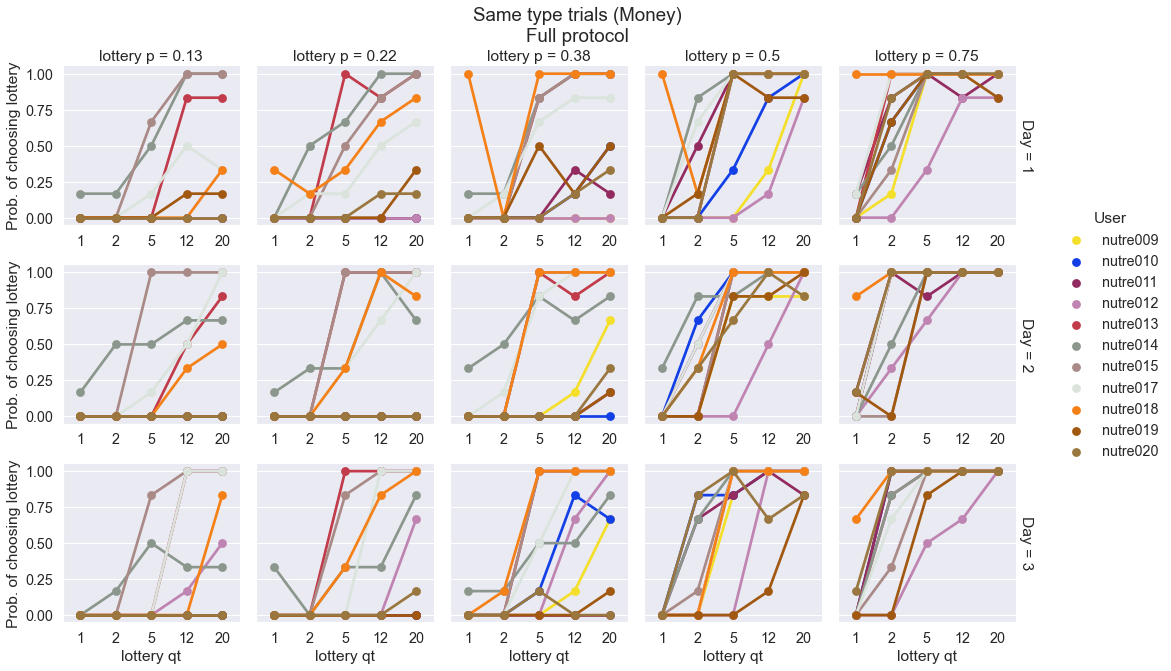

In [155]:
exluded_subjects = ['nutre001', 'nutre002', 'nutre003', 'nutre004', 'nutre005',
       'nutre006', 'nutre007', 'nutre008','nutre016'] 

trial_type = 'same'
lottery_type = 'money'

df = neuroEcon_choiceCount_df[
        (neuroEcon_choiceCount_df['Trial Type'] == trial_type) 
        &
        (neuroEcon_choiceCount_df['lottery type'] == lottery_type)]

df = df[~df['User'].isin(exluded_subjects)]

fg = sns.catplot(data= df, col = 'lottery p', row ="Day", 
    x="lottery qt", y=probLotteryChoice_colName, hue="User", 
    hue_order=sorted(list(df['User'].unique())),
    kind = 'point', palette = palette[8:],
    height=3, aspect = 1,
    sharex=False, margin_titles = True
    )

fg.fig.suptitle('Same type trials (Money)\nFull protocol', va = 'bottom');

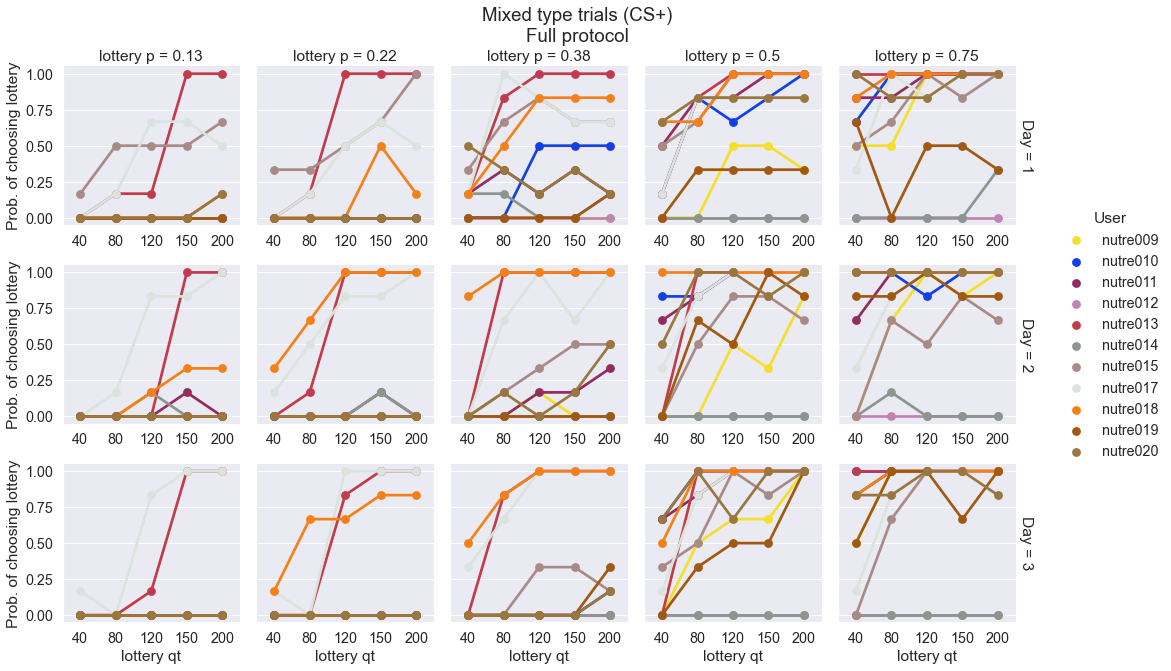

In [156]:
exluded_subjects = ['nutre001', 'nutre002', 'nutre003', 'nutre004', 'nutre005',
       'nutre006', 'nutre007', 'nutre008','nutre016'] 

trial_type = 'mixed'
lottery_type = 'C+'

df = neuroEcon_choiceCount_df[
        (neuroEcon_choiceCount_df['Trial Type'] == trial_type) 
        &
        (neuroEcon_choiceCount_df['lottery type'] == lottery_type)]

df = df[~df['User'].isin(exluded_subjects)]

fg = sns.catplot(data= df, col = 'lottery p', row ="Day", 
    x="lottery qt", y=probLotteryChoice_colName, hue="User", 
    hue_order=sorted(list(df['User'].unique())),
    kind = 'point', palette = palette[8:],
    height=3, aspect = 1,
    sharex=False, margin_titles = True
    )

fg.fig.suptitle('Mixed type trials (CS+)\nFull protocol', va = 'bottom');

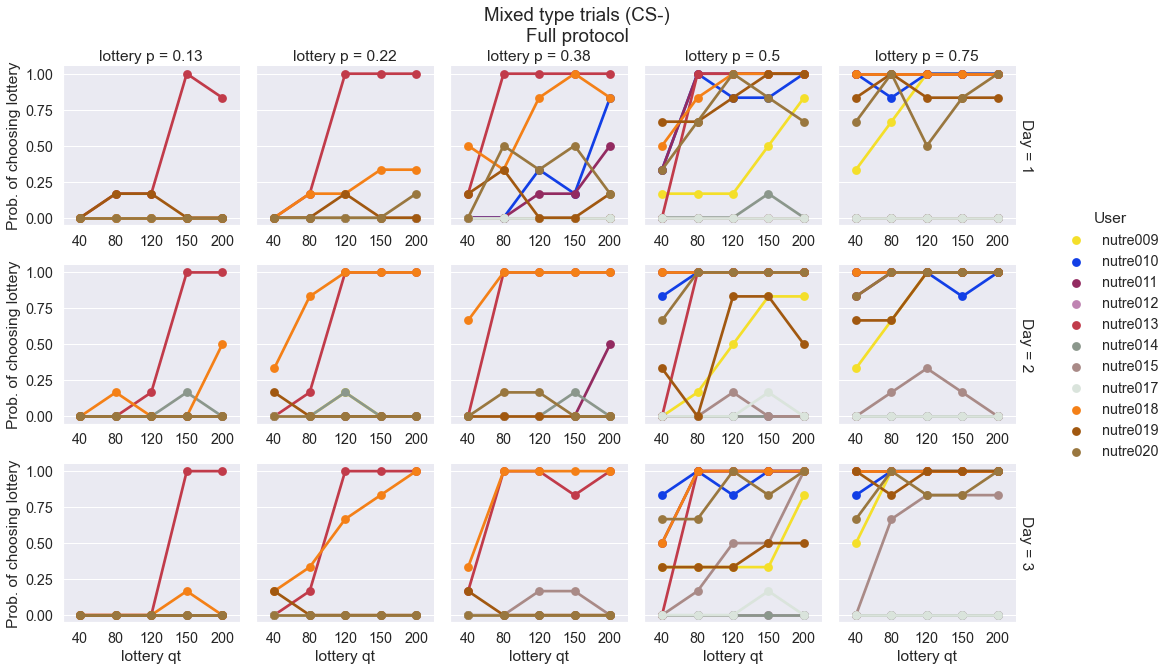

In [157]:
exluded_subjects = ['nutre001', 'nutre002', 'nutre003', 'nutre004', 'nutre005',
       'nutre006', 'nutre007', 'nutre008','nutre016'] 

trial_type = 'mixed'
lottery_type = 'C-'

df = neuroEcon_choiceCount_df[
        (neuroEcon_choiceCount_df['Trial Type'] == trial_type) 
        &
        (neuroEcon_choiceCount_df['lottery type'] == lottery_type)]

df = df[~df['User'].isin(exluded_subjects)]

fg = sns.catplot(data= df, col = 'lottery p', row ="Day", 
    x="lottery qt", y=probLotteryChoice_colName, hue="User", 
    hue_order=sorted(list(df['User'].unique())),
    kind = 'point', palette = palette[8:],
    height=3, aspect = 1,
    sharex=False, margin_titles = True
    )

fg.fig.suptitle('Mixed type trials (CS-)\nFull protocol', va = 'bottom');

In [40]:
column_names = ['reference type', 'reference qt', 'reference p',
                'lottery type', 'lottery qt', 'lottery p',
                'ref_alpha', 'lott_alpha', 'beta',
                'ref_EU', 'lott_EU', 'pL', 'choice',
                'ref_alphaEstimates', 'lott_alphaEstimates', 'betaEstimates',
                'ref_alphaEstimStdErr', 'lott_alphaEstimStdErr', 'betaEstimStdErr',
                'scal_factor_CplusEstimates', 'scal_factor_CplusEstimStdErr',
                'scal_factor_CminusEstimates', 'scal_factor_CminusEstimStdErr']
optimize_cols = column_names[:6]  + [column_names[12]]

# ======================================================
#         Same-Type Parameters (alpha and beta)
# ======================================================
def get_EU_(p,X, alpha):
  """
  Computes Expected Utility.

  Parameter
  ---------
  p : float
      Reward probability
  X : float
      Reward quantity
  alpha : float
      Risk-aversion parameter

  Returns
  -------
  float
      Expected Utility.
  """
  return p * X**alpha

def get_pL_(euL, euR, beta):
  """
  Computes probability of choosing lottery option.

  Parameter
  ---------
  euL : float
      Expected Utility for lottery option
  euR : float
      Expected Utility for reference option
  beta : float
      Noise parameter

  Returns
  -------
  float
      Probability of choosing lottery option.  
  """
  return 1 - 1/(1 + np.exp(beta * (euL - euR)))


def get_likelihood(row, params, cols = optimize_cols):
  """ 
  Calculates the likelihood of a given choice in one trial.

  Parameter
  ---------
  row : pandas series (row)
      trial information and structure
  params : tupple
      parameter estimates
  cols : list
      list of column names - ['reference type',  'reference qt',
                    'reference p', 'lottery type', 'lottery qt',
                    'lottery p', 'choice']

  Returns
  -------
  float
      Likelihood

  """

  ref_type = row[cols[0]]   # reference reward type (CS+, CS- or money)
  ref_X = row[cols[1]]      # reference reward quantity
  ref_p = row[cols[2]]      # reference reward probability
  lott_type = row[cols[3]]  # lottery reward 
  lott_X = row[cols[4]]     # lottery reward
  lott_p = row[cols[5]]     # lottery reward
  choice = row[cols[6]]     # subject choice

  # map parameter estimates to variables
  if len(params) == 4:
    (alpha_money, alpha_Cplus, alpha_Cminus, beta) = params
    alphas = {'money' : alpha_money,
             'C+' : alpha_Cplus,
             'C-' : alpha_Cminus}
    ref_alpha = alphas[ref_type]
    lott_alpha = alphas[lott_type]
  elif len(params) == 6:
    (alpha_money, alpha_Cplus, alpha_Cminus, beta_money, beta_Cplus, beta_Cminus) = params
    alphas = {'money' : alpha_money,
             'C+' : alpha_Cplus,
             'C-' : alpha_Cminus}
    betas = {'money' : beta_money,
             'C+' : beta_Cplus,
             'C-' : beta_Cminus}
    ref_alpha = alphas[ref_type]
    lott_alpha = alphas[lott_type]
    beta = betas[lott_type]
  
  # compute reference Expected Utility
  ref_EU = get_EU_(ref_p, ref_X, ref_alpha)
  # compute lottery Expected Utility
  lott_EU = get_EU_(lott_p, lott_X, lott_alpha)
  # compute probability of choosing lottery
  pL = get_pL_(lott_EU, ref_EU, beta)

  if choice == 1:
    likelihood = pL
  else:
    likelihood = 1 - pL
  return likelihood

def get_negLogLikelihood(params, args):

  """ 
  Computes begative log-likelihood of parameter estimates. Used with scipy.optimize.minimize.

  Parameters
  ----------
  params : tupple
      parameter estimates
  args : pandas DataFrame
      dataframe with trial information and subject choices

  Returns
  -------
  float
      Negative log-likelihood
  """

  df = args
  task_cols = optimize_cols
  # compute likelihood of each choice
  likelihood = df.apply(lambda row: get_likelihood(row, params, task_cols), axis=1).values
  # Take negative of logLikelihood for convention
  negloglikelihood = - np.sum(np.log(likelihood))
  return negloglikelihood

# ==============================================
#     Mixed-Type Parameters (alpha and beta)
# ==============================================

# compute expected utility
def get_mixed_EU_(p,X, reward_type, parsCI):
  # This value is obtained by multiplying the probability of recieving a specific reward associated with a choice by the real value of the reward. Furthermore, the real value is raised to the power of an alpha parameter
  # which represents the subject-by-subject level of risk aversion for a specific reward type. If alpha > 1, the indiviudal is considered a risk seaker and if alpha < 1, the individual is considered risk averse.
  if reward_type == 'money':
    alpha = float(parsCI[0].split(' ')[0])
  elif reward_type == 'C+':
    alpha = float(parsCI[1].split(' ')[0])
  elif reward_type == 'C-':
    alpha = float(parsCI[2].split(' ')[0])
  return p * X**alpha

# Probability of chosing lottery given the expected utility of both choices (logistic function)
# In this case, I am taking into account mixed type trials in which the reference option is money and the lottery option is C+ or C-
# Note that multiplying by a scaling factor nests the same type trials, in which the scaling factor is 1
def get_mixed_pL_(euL, euR, scaling_factor, parsCI):
  # get beta value estimated for same type trials
  beta = float(parsCI[3].split(' ')[0])
  return 1 - 1/(1 + np.exp(beta * (euL * scaling_factor - euR)))

# this function nests get_mixed_pL_ to compute the likelihood of the evidence (choices) given the hypothesis (internal parameters of the model)
# observational model (the function I want to maximize; I want to see "where" is the maximum of this function, which is to say, I want to find the internal model parameters for which this function peaks...
# ...OR, which are the parameters that better explain my evidence (in this case, observed behavior in the form of trial by trial choices)) 

# Added parsCI = parsCI as input. parsCI contains the alphas necessary for computing expected utilities
def get_mixed_likelihood(row, params, cols, parsCI):
  # search for the reward type of the reference option
  ref_type = row[cols[0]]
  # search for the reward type of the lottery option
  lott_type = row[cols[3]]

  # not sure if this should include beta
  (scaling_factor_Cplus, scaling_factor_Cminus) = params # parameters I want to estimate
  
  scaling_factors = {'C+' : scaling_factor_Cplus,
                      'C-' : scaling_factor_Cminus}

  choice = row[cols[6]]

  ref_X = row[cols[1]]
  ref_p = row[cols[2]]
  # Switched the ref_alpha for [ref_type, parsCI] that allow me to get the alpha values for the same type trials
  ref_EU = get_mixed_EU_(ref_p, ref_X, ref_type, parsCI)
  
  lott_X = row[cols[4]]
  lott_p = row[cols[5]]
  # Switched the lott_alpha for [lott_type, parsCI] that allow me to get the alpha values fo rthe same type trials
  lott_EU = get_mixed_EU_(lott_p, lott_X, lott_type, parsCI)

  # Added scaling_factor which is now necessary for computing likelihood
  pL = get_mixed_pL_(lott_EU, ref_EU, scaling_factors[lott_type], parsCI)
  # 0 - chosing the reference option; 1 - chosing the lottery option; 2 - missed trial (need to confirm with Francisco)
  if choice == 1:
    likelihood = pL
  else:
    likelihood = 1 - pL
  return likelihood

# working with the log of the likelihood instead of the likelihood directly is numerically more stable
# if you print negloglikelihood and run the following cell, you will notice that the likelihood distribution of the parameters is not continuous in the whole space (goes to infinite for some parameter combinations)
def get_mixed_negLogLikelihood(params, args):
  df = args[0]
  parsCI = args[1] 
  task_cols = optimize_cols
  # compute likelihood of each choice and saves likelihoods in 
  likelihood = df.apply(lambda row: get_mixed_likelihood(row, params, task_cols, parsCI), axis=1).values
  # Take negative of logLikelihood for convention
  negloglikelihood = - np.sum(np.log(likelihood))
  return negloglikelihood


def get_day_parameters(df_day):
  alphaMoney0 = 0
  alphaCplus0 = 0
  alphaCminus0 = 0
  beta0 = 0

  df_sameType = df_day[df_day['Trial Type'] == 'same']
  df_sameType['choice'] = np.where(df_sameType['choice'] == 2, 1, 0)

  args = (df_sameType)
  x0 = (alphaMoney0, alphaCplus0, alphaCminus0, beta0)
  res = minimize(get_negLogLikelihood, x0, args=args )
  print('BLA')

  parsCI = ['{} \xb1 {}'.format(round(res.x[p],3), round(1.96*np.sqrt(np.diag(res.hess_inv))[p],3)) for p in range(len(res.x))]

  # __________________________________________
  # Mixed-Type

  # parsCI = parsCI_d2

  # define starting values for the internal parameters of the model
  scaling_factor_Cplus = 1
  scaling_factor_Cminus = 1

  # create a new dataframe containing only the mixed type trials from day 2 neuroecon task
  df_mixedType = df_day[df_day['Trial Type'] == 'mixed']

  df_mixedType['choice'] = np.where(df_mixedType['choice'] == 2, 1, 0)

  args_MT = (df_mixedType)

  # starting guess
  x0_MT = (scaling_factor_Cplus, scaling_factor_Cminus)
  # in order to obtain to most likely parameters, we take the negative of the log likelihood function and minimize it
  res_MT = minimize(get_mixed_negLogLikelihood, x0_MT, args=[args_MT, parsCI]) # options={'maxiter' : 100})

  # hessian - variance and covariance (how peaked is the function maximum); inverse hessian - how spread is the log likelihood function around the maximum
  # the reverse hessian (matrix containing the second derivative of the likelihood function with respect to the internal model parameters) can be use to compute confidence intervals
  parsCI_MT = ['{} \xb1 {}'.format(round(res_MT.x[p],3), round(1.96*np.sqrt(np.diag(res_MT.hess_inv))[p],3)) for p in range(len(res_MT.x))]
  
  return parsCI, parsCI_MT

sub_dic = {}
def estimate_Subejct_parameters(grouped_df):

  parameter_cols = ['alpha CS+ day2', 
                    'alpha CS- day2', 
                    'alpha Money day2',
                    'beta day2',
                    'scalingFactor CS+ day2',
                    'scalingFactor CS- day2',

                    'alpha CS+ day3', 
                    'alpha CS- day3', 
                    'alpha Money day3',
                    'beta day3',
                    'scalingFactor CS+ day3',
                    'scalingFactor CS- day3',
                    
                    'alpha CS+ day1', 
                    'alpha CS- day1', 
                    'alpha Money day1',
                    'beta day1',
                    'scalingFactor CS+ day1',
                    'scalingFactor CS- day1']

  dic = {}  
  # ==========================================
  #                   Day 1
  # ==========================================
  df_day1 = grouped_df[grouped_df['Day'] == 1]
  if len(df_day1) > 0:
    print('BLE')
    parsCI_d1, parsCI_d1_MT = get_day_parameters(df_day1)
    dic[parameter_cols[12]] = parsCI_d1[1]
    dic[parameter_cols[13]] = parsCI_d1[2]
    dic[parameter_cols[14]] = parsCI_d1[0]
    dic[parameter_cols[15]] = parsCI_d1[3]
    dic[parameter_cols[16]] = parsCI_d1_MT[0]
    dic[parameter_cols[17]] = parsCI_d1_MT[1]
  else:
    dic[parameter_cols[12]] = ''
    dic[parameter_cols[13]] = ''
    dic[parameter_cols[14]] = ''
    dic[parameter_cols[15]] = ''
    dic[parameter_cols[16]] = ''
    dic[parameter_cols[17]] = ''


  # ==========================================
  #                   Day 2
  # ==========================================
  # __________________________________________

  df_day2 = grouped_df[grouped_df['Day'] == 2]
  
  parsCI_d2, parsCI_d2_MT = get_day_parameters(df_day2)

  if len(df_day2) > 0:
    dic[parameter_cols[0]] = parsCI_d2[1]
    dic[parameter_cols[1]] = parsCI_d2[2]
    dic[parameter_cols[2]] = parsCI_d2[0]
    dic[parameter_cols[3]] = parsCI_d2[3]
    dic[parameter_cols[4]] = parsCI_d2_MT[0]
    dic[parameter_cols[5]] = parsCI_d2_MT[1]
  else:
    dic[parameter_cols[0]] = ''
    dic[parameter_cols[1]] = ''
    dic[parameter_cols[2]] = ''
    dic[parameter_cols[3]] = ''
    dic[parameter_cols[4]] = ''
    dic[parameter_cols[5]] = ''

  # ==========================================
  #                   Day 3
  # ==========================================
  df_day3 = grouped_df[grouped_df['Day'] == 3]
  if len(df_day3) > 0:
    parsCI_d3, parsCI_d3_MT = get_day_parameters(df_day3)
    dic[parameter_cols[6]] = parsCI_d3[1]
    dic[parameter_cols[7]] = parsCI_d3[2]
    dic[parameter_cols[8]] = parsCI_d3[0]
    dic[parameter_cols[9]] = parsCI_d3[3]
    dic[parameter_cols[10]] = parsCI_d3_MT[0]
    dic[parameter_cols[11]] = parsCI_d3_MT[1]
  else:
    dic[parameter_cols[6]] = ''
    dic[parameter_cols[7]] = ''
    dic[parameter_cols[8]] = ''
    dic[parameter_cols[9]] = ''
    dic[parameter_cols[10]] = ''
    dic[parameter_cols[11]] = ''
  
  sub_dic[grouped_df['User'].unique()[0]] = dic

  return dic

def get_Par_and_CI(allSubs_params_df):
    # Create Dataframe with mean estimates and Confidence Intervals

    allSubs_Mean_params_df = pd.DataFrame()
    allSubs_95ci_params_df = pd.DataFrame()

    for col in allSubs_params_df.columns:
        df_tmp = allSubs_params_df[col]
        allSubs_Mean_params_df[col] = df_tmp.apply(lambda x: x.split(' ')[0])
        allSubs_95ci_params_df[col] = df_tmp.apply(lambda x: x.split(' ')[-1])


    day1_cols = [s for s in allSubs_Mean_params_df.columns if 'day1' in s]
    day2_cols = [s for s in allSubs_Mean_params_df.columns if 'day2' in s]
    day3_cols = [s for s in allSubs_Mean_params_df.columns if 'day3' in s]


    allSubs_d1_Mean_params_df = allSubs_Mean_params_df[day1_cols]
    allSubs_d1_Mean_params_df.columns = [s.split(' day')[0] for s in allSubs_d1_Mean_params_df.columns]
    allSubs_d1_Mean_params_df['Day'] = 1
    allSubs_d2_Mean_params_df = allSubs_Mean_params_df[day2_cols]
    allSubs_d2_Mean_params_df.columns = [s.split(' day')[0] for s in allSubs_d2_Mean_params_df.columns]
    allSubs_d2_Mean_params_df['Day'] = 2
    allSubs_d3_Mean_params_df = allSubs_Mean_params_df[day3_cols]
    allSubs_d3_Mean_params_df.columns = [s.split(' day')[0] for s in allSubs_d3_Mean_params_df.columns]
    allSubs_d3_Mean_params_df['Day'] = 3
    mean_params_allTrials_df = pd.concat([allSubs_d1_Mean_params_df, allSubs_d2_Mean_params_df, allSubs_d3_Mean_params_df])


    allSubs_d1_CI_params_df = allSubs_95ci_params_df[day1_cols]
    allSubs_d1_CI_params_df.columns = [s.split(' day')[0] for s in allSubs_d1_CI_params_df.columns]
    allSubs_d1_CI_params_df['Day'] = 1
    allSubs_d2_CI_params_df = allSubs_95ci_params_df[day2_cols]
    allSubs_d2_CI_params_df.columns = [s.split(' day')[0] for s in allSubs_d2_CI_params_df.columns]
    allSubs_d2_CI_params_df['Day'] = 2
    allSubs_d3_CI_params_df = allSubs_95ci_params_df[day3_cols]
    allSubs_d3_CI_params_df.columns = [s.split(' day')[0] for s in allSubs_d3_CI_params_df.columns]
    allSubs_d3_CI_params_df['Day'] = 3
    CI_params_allTrials_df = pd.concat([allSubs_d1_CI_params_df, allSubs_d2_CI_params_df, allSubs_d3_CI_params_df])

    return mean_params_allTrials_df, CI_params_allTrials_df
 

In [ ]:
sub_dic = {}
all_parameters = dict(all_neuroEcon_df.groupby('User').apply(lambda group_df: estimate_Subejct_parameters(group_df)))

In [ ]:
sub_dic = {}
early_parameters = dict(all_neuroEcon_df[all_neuroEcon_df['block'] < 6].groupby('User').apply(lambda group_df: estimate_Subejct_parameters(group_df)))
late_parameters = dict(all_neuroEcon_df[all_neuroEcon_df['block'] >= 6].groupby('User').apply(lambda group_df: estimate_Subejct_parameters(group_df)))

parameters_Urep1 = dict(all_neuroEcon_df[all_neuroEcon_df['block'] < 2].groupby('User').apply(lambda group_df: estimate_Subejct_parameters(group_df)))
parameters_Urep1_2 = dict(all_neuroEcon_df[all_neuroEcon_df['block'] < 4].groupby('User').apply(lambda group_df: estimate_Subejct_parameters(group_df)))
parameters_Urep1_3 = dict(all_neuroEcon_df[all_neuroEcon_df['block'] < 6].groupby('User').apply(lambda group_df: estimate_Subejct_parameters(group_df)))
parameters_Urep1_4 = dict(all_neuroEcon_df[all_neuroEcon_df['block'] < 8].groupby('User').apply(lambda group_df: estimate_Subejct_parameters(group_df)))
parameters_Urep1_5 = dict(all_neuroEcon_df[all_neuroEcon_df['block'] < 10].groupby('User').apply(lambda group_df: estimate_Subejct_parameters(group_df)))


In [ ]:
plot group levels probability of choosing lottery shifts

quantify participants that only chose money 

In [230]:
mean_params_allSubs_df

,alpha CS+,alpha CS-,alpha Money,beta,scalingFactor CS+,scalingFactor CS-,Day
nutre001,,,,,,,1
nutre002,,,,,,,1
nutre003,,,,,,,1
nutre004,,,,,,,1
nutre005,,,,,,,1
nutre006,,,,,,,1
nutre007,,,,,,,1
nutre008,,,,,,,1
nutre009,0.227,0.288,0.269,7.369,0.361,0.282,1
nutre010,0.457,0.437,0.358,2.952,0.165,0.193,1


C:\Users\Admin\AppData\Local\Temp\ipykernel_4888\663974132.py:432: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  allSubs_d1_Mean_params_df['Day'] = 1
C:\Users\Admin\AppData\Local\Temp\ipykernel_4888\663974132.py:435: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  allSubs_d2_Mean_params_df['Day'] = 2
C:\Users\Admin\AppData\Local\Temp\ipykernel_4888\663974132.py:438: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inste

Text(0.5, 0.98, 'Mean parameter Estimates\n(All trials and subjects)')

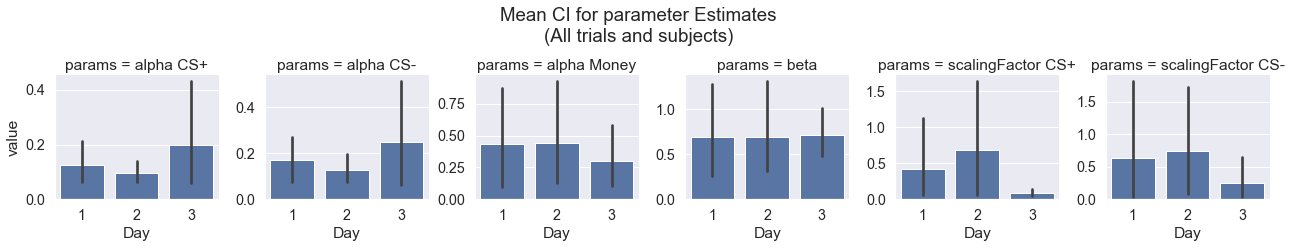

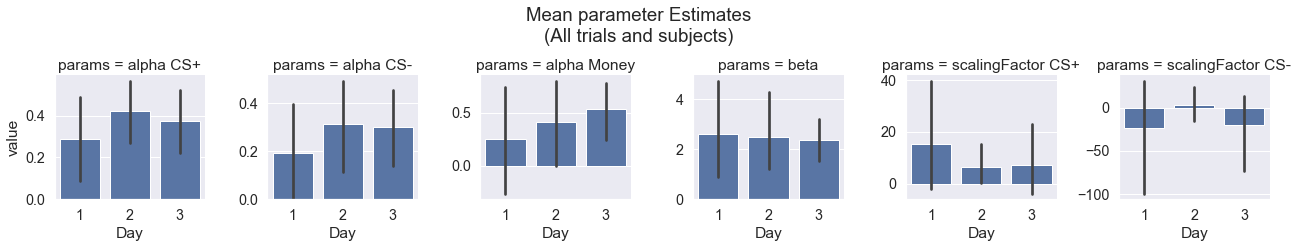

In [221]:
mean_params_allSubs_df, CI_params_allSubs_df = get_Par_and_CI(pd.DataFrame.from_dict(all_parameters).T)

ci_params_longdf = CI_params_allSubs_df.melt(id_vars = 'Day', var_name='params').reset_index(drop=True)

ci_params_longdf = ci_params_longdf.replace('', np.nan)
ci_params_longdf.dropna(subset='value', inplace = True)
ci_params_longdf['value'] = ci_params_longdf['value'].astype(float)
ci_params_longdf['Day'] = ci_params_longdf['Day'].astype(object)
ci_params_longdf.dtypes
ci_params_longdf = ci_params_longdf[abs(ci_params_longdf['value'])<10]

g = sns.FacetGrid(ci_params_longdf, col="params", sharey = False)
g.map_dataframe(sns.barplot, x = 'Day', y = 'value')

g.fig.suptitle('Mean CI for parameter Estimates\n(All trials and subjects)', va = 'bottom')

mean_params_longdf = mean_params_allSubs_df.melt(id_vars = 'Day', var_name='params').reset_index()
import numpy as np
mean_params_longdf = mean_params_longdf.replace('', np.nan)
mean_params_longdf.dropna(subset='value', inplace = True)
mean_params_longdf['value'] = mean_params_longdf['value'].astype(float)
mean_params_longdf.dtypes

# mean_params_longdf = mean_params_longdf[abs(mean_params_longdf['value'])<10]

g = sns.FacetGrid(mean_params_longdf, col="params", sharey = False)
g.map_dataframe(sns.barplot, x = 'Day', y = 'value')
g.fig.suptitle('Mean parameter Estimates\n(All trials and subjects)', va = 'bottom')

C:\Users\Admin\AppData\Local\Temp\ipykernel_4888\663974132.py:432: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  allSubs_d1_Mean_params_df['Day'] = 1
C:\Users\Admin\AppData\Local\Temp\ipykernel_4888\663974132.py:435: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  allSubs_d2_Mean_params_df['Day'] = 2
C:\Users\Admin\AppData\Local\Temp\ipykernel_4888\663974132.py:438: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inste

Text(0.5, 0.98, 'Mean parameter Estimates\n(Late trials and subjects)')

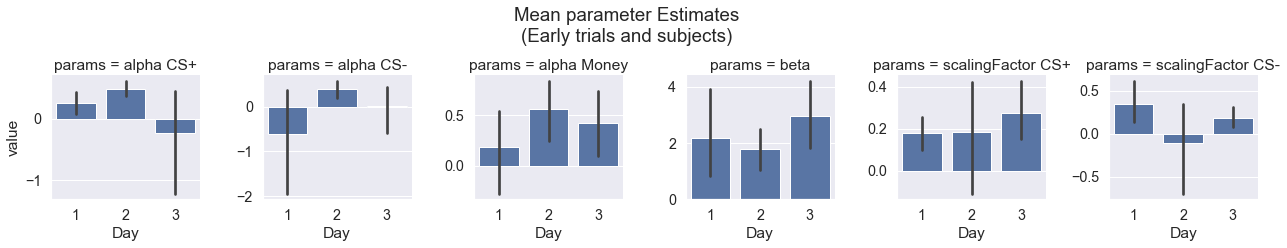

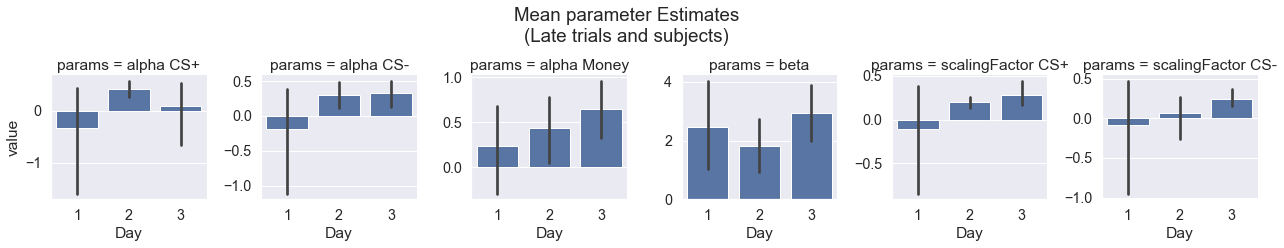

In [215]:
def barplots(CI_params_allSubs_df):
    ci_params_longdf = CI_params_allSubs_df.melt(id_vars = 'Day', var_name='params').reset_index(drop=True)
    ci_params_longdf = ci_params_longdf.replace('', np.nan)
    ci_params_longdf.dropna(subset='value', inplace = True)
    ci_params_longdf['value'] = ci_params_longdf['value'].astype(float)
    ci_params_longdf['Day'] = ci_params_longdf['Day'].astype(object)
    ci_params_longdf.dtypes
    ci_params_longdf = ci_params_longdf[abs(ci_params_longdf['value'])<10]

    g = sns.FacetGrid(ci_params_longdf, col="params", sharey = False)
    g.map_dataframe(sns.barplot, x = 'Day', y = 'value')
    return g


mean_params_early_df, CI_params_early_df = get_Par_and_CI(pd.DataFrame.from_dict(early_parameters).T)

g = barplots(mean_params_early_df)
g.fig.suptitle('Mean parameter Estimates\n(Early trials and subjects)', va = 'bottom')

mean_params_late_df, CI_params_late_df = get_Par_and_CI(pd.DataFrame.from_dict(late_parameters).T)

g = barplots(mean_params_late_df)
g.fig.suptitle('Mean parameter Estimates\n(Late trials and subjects)', va = 'bottom')


Text(0.5, 0.98, 'Mean CI for parameter Estimates\n(Late trials and subjects)')

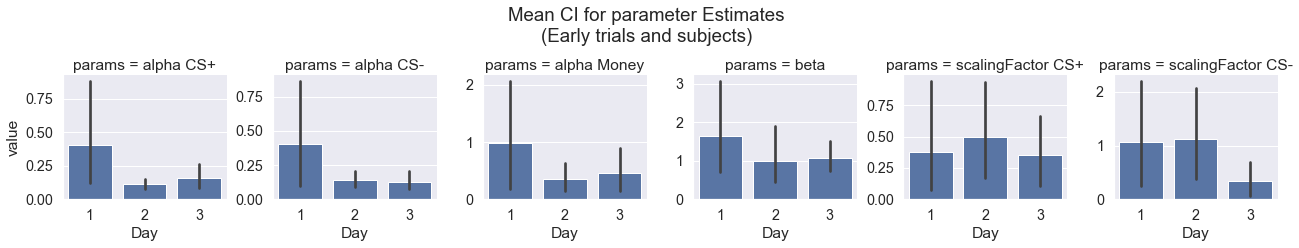

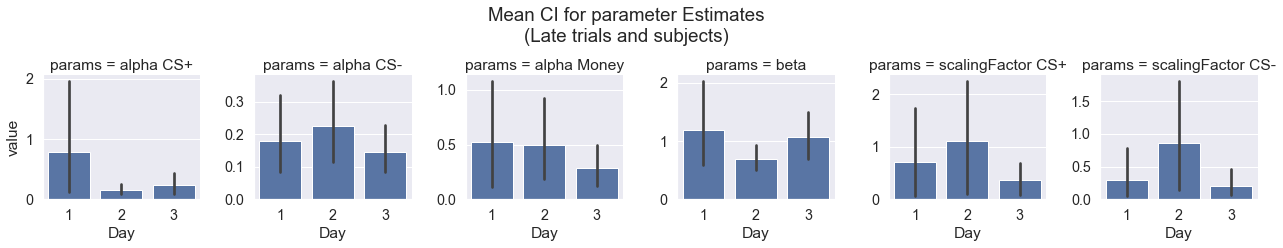

In [216]:
g = barplots(CI_params_early_df)
g.fig.suptitle('Mean CI for parameter Estimates\n(Early trials and subjects)', va = 'bottom')
g = barplots(CI_params_late_df)
g.fig.suptitle('Mean CI for parameter Estimates\n(Late trials and subjects)', va = 'bottom')

C:\Users\Admin\AppData\Local\Temp\ipykernel_4888\663974132.py:432: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  allSubs_d1_Mean_params_df['Day'] = 1
C:\Users\Admin\AppData\Local\Temp\ipykernel_4888\663974132.py:435: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  allSubs_d2_Mean_params_df['Day'] = 2
C:\Users\Admin\AppData\Local\Temp\ipykernel_4888\663974132.py:438: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inste

Text(0.5, 0.98, 'Mean parameter Estimates\n(All reps)')

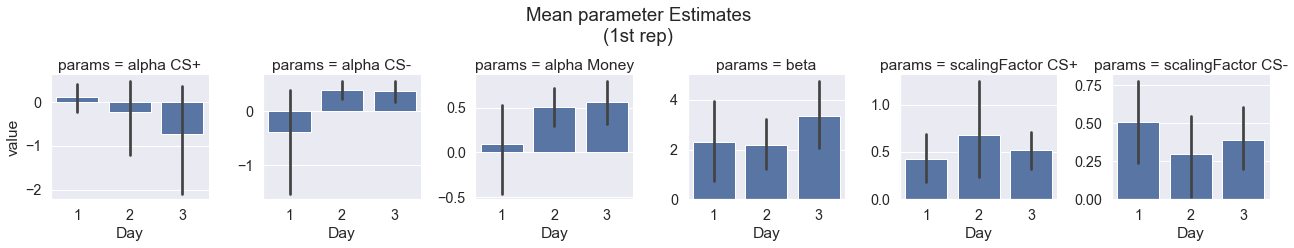

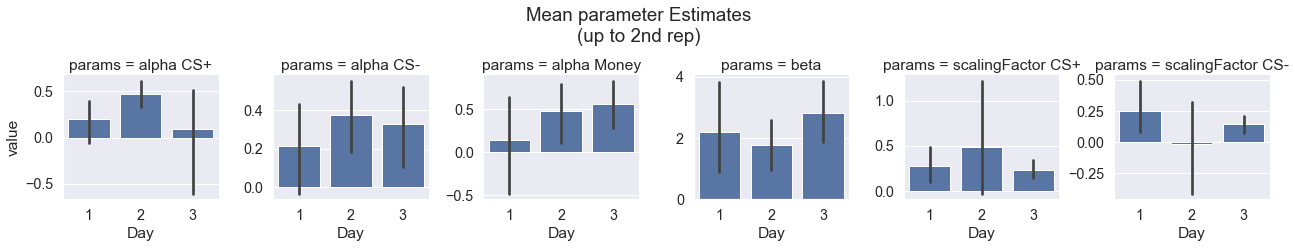

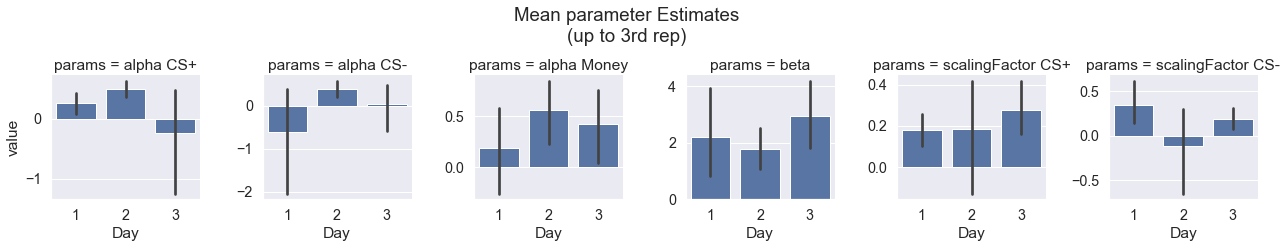

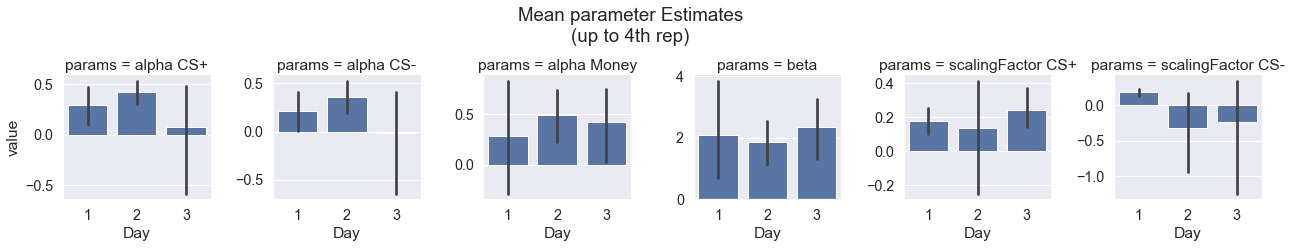

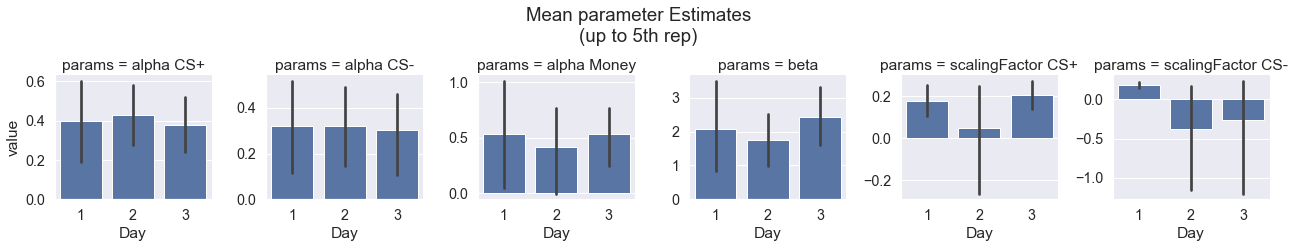

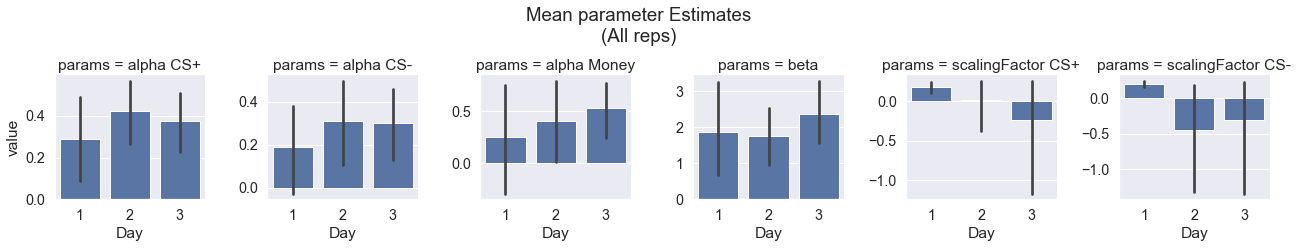

In [222]:
mean_params_1_df, CI_params_1_df = get_Par_and_CI(pd.DataFrame.from_dict(parameters_Urep1).T)
mean_params_1_2_df, CI_params_1_2_df = get_Par_and_CI(pd.DataFrame.from_dict(parameters_Urep1_2).T)
mean_params_1_3_df, CI_params_1_3_df = get_Par_and_CI(pd.DataFrame.from_dict(parameters_Urep1_3).T)
mean_params_1_4_df, CI_params_1_4_df = get_Par_and_CI(pd.DataFrame.from_dict(parameters_Urep1_4).T)
mean_params_1_5_df, CI_params_1_5_df = get_Par_and_CI(pd.DataFrame.from_dict(parameters_Urep1_5).T)


g = barplots(mean_params_1_df)
g.fig.suptitle('Mean parameter Estimates\n(1st rep)', va = 'bottom')

g = barplots(mean_params_1_2_df)
g.fig.suptitle('Mean parameter Estimates\n(up to 2nd rep)', va = 'bottom')

g = barplots(mean_params_1_3_df)
g.fig.suptitle('Mean parameter Estimates\n(up to 3rd rep)', va = 'bottom')

g = barplots(mean_params_1_4_df)
g.fig.suptitle('Mean parameter Estimates\n(up to 4th rep)', va = 'bottom')

g = barplots(mean_params_1_5_df)
g.fig.suptitle('Mean parameter Estimates\n(up to 5th rep)', va = 'bottom')

g = barplots(mean_params_allSubs_df)
g.fig.suptitle('Mean parameter Estimates\n(All reps)', va = 'bottom')

Text(0.5, 0.98, 'Mean parameter Estimates\n(All reps)')

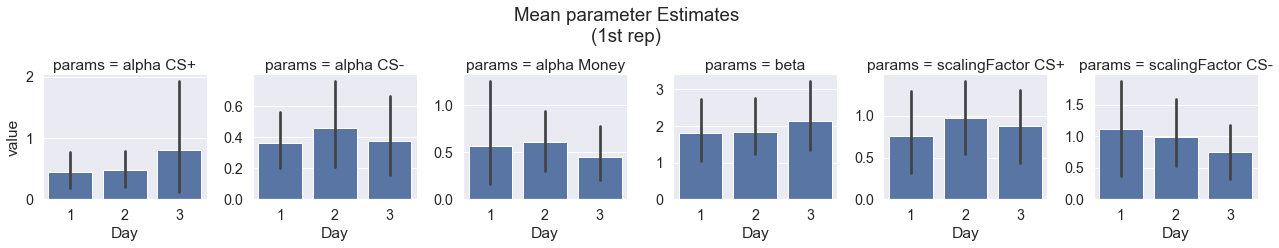

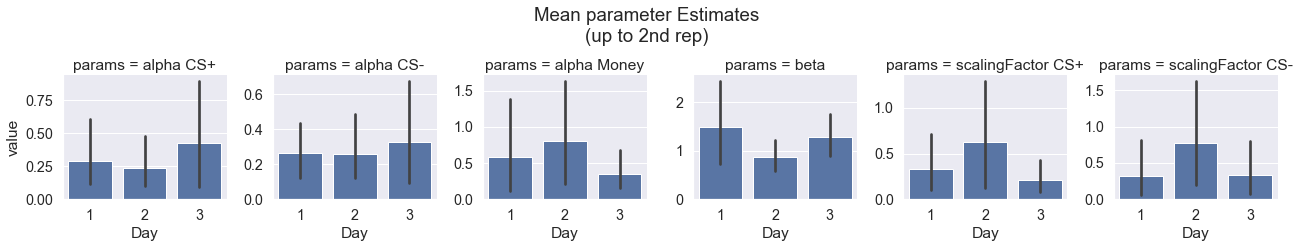

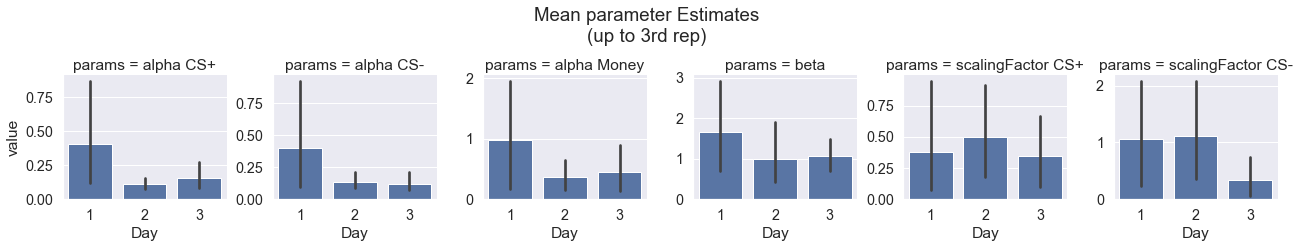

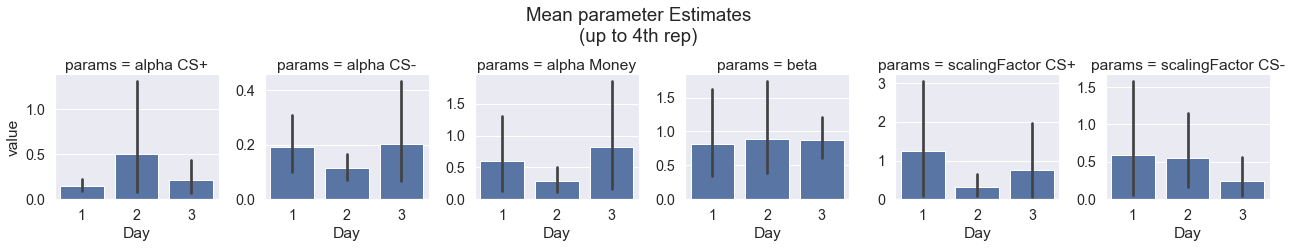

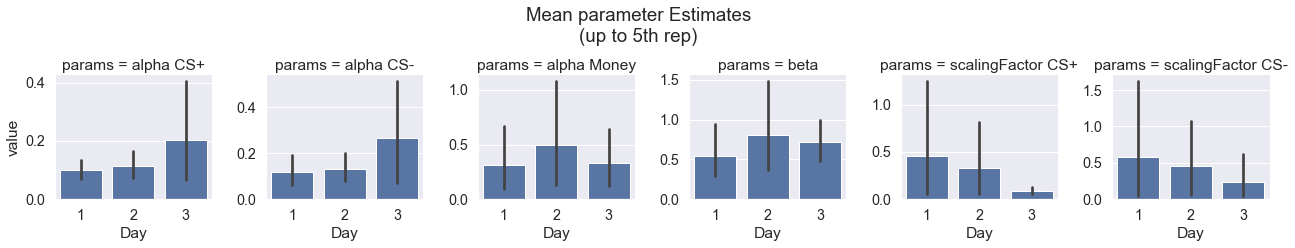

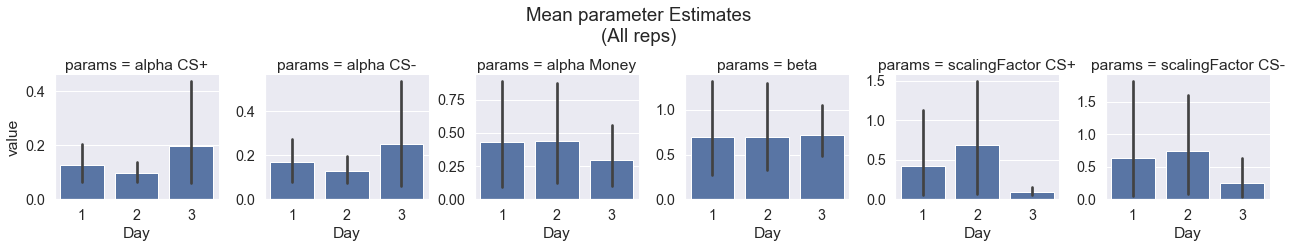

In [224]:
g = barplots(CI_params_1_df)
g.fig.suptitle('Mean parameter Estimates\n(1st rep)', va = 'bottom')

g = barplots(CI_params_1_2_df)
g.fig.suptitle('Mean parameter Estimates\n(up to 2nd rep)', va = 'bottom')

g = barplots(CI_params_1_3_df)
g.fig.suptitle('Mean parameter Estimates\n(up to 3rd rep)', va = 'bottom')

g = barplots(CI_params_1_4_df)
g.fig.suptitle('Mean parameter Estimates\n(up to 4th rep)', va = 'bottom')

g = barplots(CI_params_1_5_df)
g.fig.suptitle('Mean parameter Estimates\n(up to 5th rep)', va = 'bottom')

g = barplots(CI_params_allSubs_df)
g.fig.suptitle('Mean parameter Estimates\n(All reps)', va = 'bottom')

## 4. Flavor vs NUTRECON

In [6]:
allRatings_df.head()

,Day,Trial,User,intensity,intensity_timestamp,novelty,novelty_timestamp,pleasantness,pleasantness_timestamp,Flavor,flavor_id
0,1,1,nutre017,11,1677148316,75,1677148300,0,1677148337,blueberry,g
1,1,2,nutre017,3,1677148386,81,1677148371,0,1677148396,licorice,k
2,1,3,nutre017,4,1677148434,14,1677148422,3,1677148441,grapefruit,j
3,1,4,nutre017,3,1677148474,0,1677148459,-2,1677148483,lychee,d
4,1,5,nutre017,27,1677148520,53,1677148512,-30,1677148527,cashew,c


In [7]:
all_neuroEcon_df.head()

,Day,Trial,Trial ID,Trial Type,User,block,choice,choiceStart_ms,choiceTime,choiceTime_ms,...,lottery shape,lottery type,optionTime,reference flavor,reference p,reference qt,reference shape,reference type,trialStartTimestamp,trialStart_ms
0,1,1,119,mixed,nutre017,0,1,6323117,2250,6323470,...,square,C-,2000,,1.0,0.2,,money,1677152957,6321185
1,1,2,97,mixed,nutre017,0,1,6326239,2250,6326773,...,cross,C+,2000,,1.0,0.2,,money,1677152960,6324285
2,1,3,47,same,nutre017,0,1,6329556,2250,6329876,...,cross,C+,2000,ginseng,1.0,20.0,cross,C+,1677152964,6327585
3,1,4,32,same,nutre017,0,1,6332627,2250,6333246,...,cross,C+,2000,ginseng,1.0,20.0,cross,C+,1677152967,6330700
4,1,5,34,same,nutre017,0,2,6336030,2250,6336934,...,cross,C+,2000,ginseng,1.0,20.0,cross,C+,1677152970,6334061


In [8]:
calorieCodes_df.head()

,sub_id,Flavor,shape,calorie
0,nutre001,pomegranate,square,C+
1,nutre001,cashew,hexagon,C-
2,nutre002,grapefruit,cross,C+
3,nutre002,pomegranate,hexagon,C-
4,nutre003,ginseng,cross,C+


In [9]:
list(all_neuroEcon_df.columns)

['Day',
 'Trial',
 'Trial ID',
 'Trial Type',
 'User',
 'block',
 'choice',
 'choiceStart_ms',
 'choiceTime',
 'choiceTime_ms',
 'feedbackTime',
 'lottery flavor',
 'lottery p',
 'lottery qt',
 'lottery shape',
 'lottery type',
 'optionTime',
 'reference flavor',
 'reference p',
 'reference qt',
 'reference shape',
 'reference type',
 'trialStartTimestamp',
 'trialStart_ms']

In [63]:
all_neuroEcon_df = all_neuroEcon_df.drop_duplicates()
all_neuroEcon_df[all_neuroEcon_df['choice'] !=0][['User', 'Day', 'Trial Type']].groupby(['User','Day']).value_counts()

User      Day  Trial Type  
nutre001  2    same            444
               mixed           300
               mixed_yogurt     30
          3    same            447
               mixed           300
                              ... 
nutre020  2    mixed           300
               mixed_yogurt     30
          3    same            450
               mixed           300
               mixed_yogurt     30
Length: 156, dtype: int64

In [64]:
# quantify Money Choices

choice_count_df = all_neuroEcon_df[all_neuroEcon_df['Trial Type'] == 'mixed'][['User', 'Day', 'choice', 'Trial Type','lottery flavor']].groupby(['User', 'Day', 'Trial Type','lottery flavor']).value_counts().reset_index().rename(columns={0:'count'})
choice_count_df.head(10)

,User,Day,Trial Type,lottery flavor,choice,count
0,nutre001,2,mixed,cashew,1,148
1,nutre001,2,mixed,cashew,2,2
2,nutre001,2,mixed,pomegranate,2,102
3,nutre001,2,mixed,pomegranate,1,48
4,nutre001,3,mixed,cashew,1,149
5,nutre001,3,mixed,cashew,2,1
6,nutre001,3,mixed,pomegranate,2,119
7,nutre001,3,mixed,pomegranate,1,31
8,nutre002,2,mixed,grapefruit,1,101
9,nutre002,2,mixed,grapefruit,2,49


In [65]:
choice_count_df = choice_count_df.merge(allRatings_df, left_on=['User', 'Day', 'lottery flavor'], right_on=['User', 'Day', _v_.flavorName_colName]).drop(columns = 'lottery flavor')
choice_count_df.columns

Index(['User', 'Day', 'Trial Type', 'choice', 'count', 'Trial', 'intensity',
       'intensity_timestamp', 'novelty', 'novelty_timestamp', 'pleasantness',
       'pleasantness_timestamp', 'Flavor', 'flavor_id'],
      dtype='object')

In [66]:
choice_count_df[choice_count_df['choice'] ==2][['count', _v_]]

KeyError: '[<variableCoding.Vars object at 0x000002165847B940>] not in index'

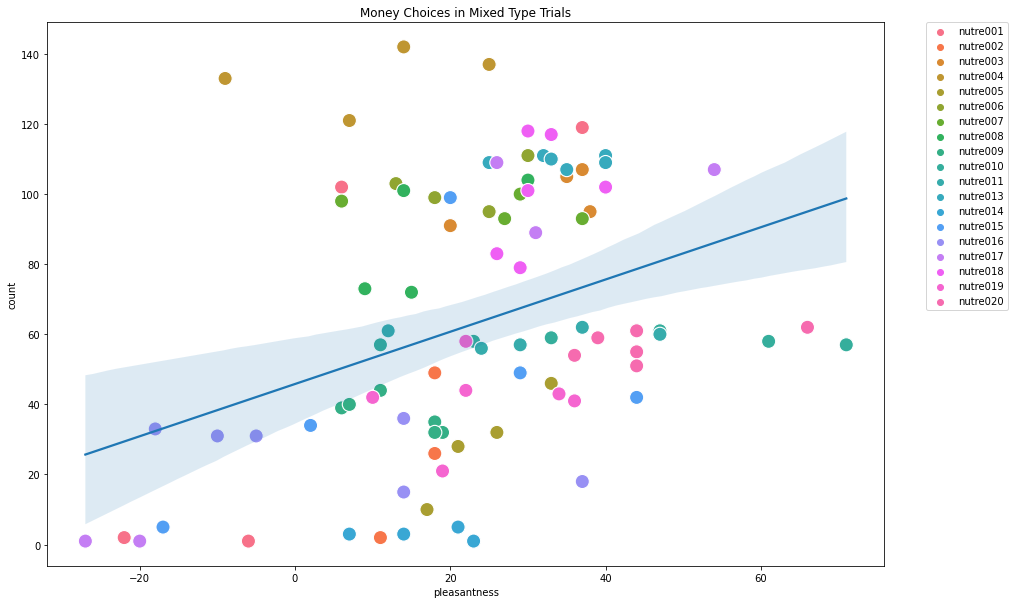

In [67]:
fig, ax = plt.subplots(figsize= [15,10])
sns.scatterplot(data = choice_count_df[choice_count_df['choice'] ==2], x = _v_.pleasanteness_colName, y = 'count', hue = 'User', ax = ax,  s=200)
sns.regplot(data = choice_count_df[choice_count_df['choice'] ==2], x = _v_.pleasanteness_colName, y = 'count', scatter = False, ax = ax)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title('Money Choices in Mixed Type Trials');

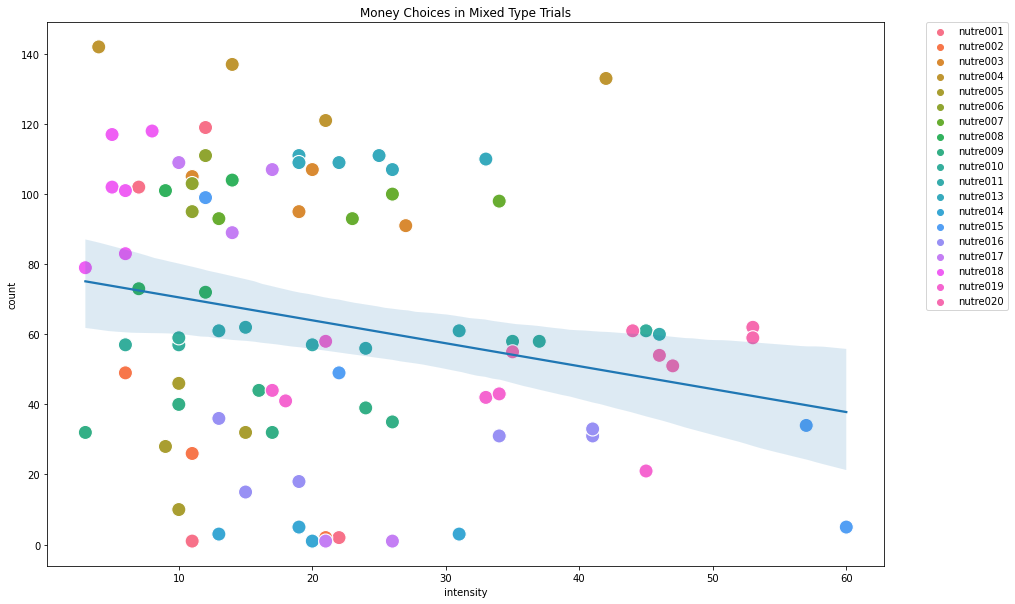

In [68]:
fig, ax = plt.subplots(figsize= [15,10])
sns.scatterplot(data = choice_count_df[choice_count_df['choice'] ==2], x = _v_.intensity_colName, y = 'count', hue = 'User', ax = ax,  s=200)
sns.regplot(data = choice_count_df[choice_count_df['choice'] ==2], x = _v_.intensity_colName, y = 'count', scatter = False, ax = ax)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title('Money Choices in Mixed Type Trials');

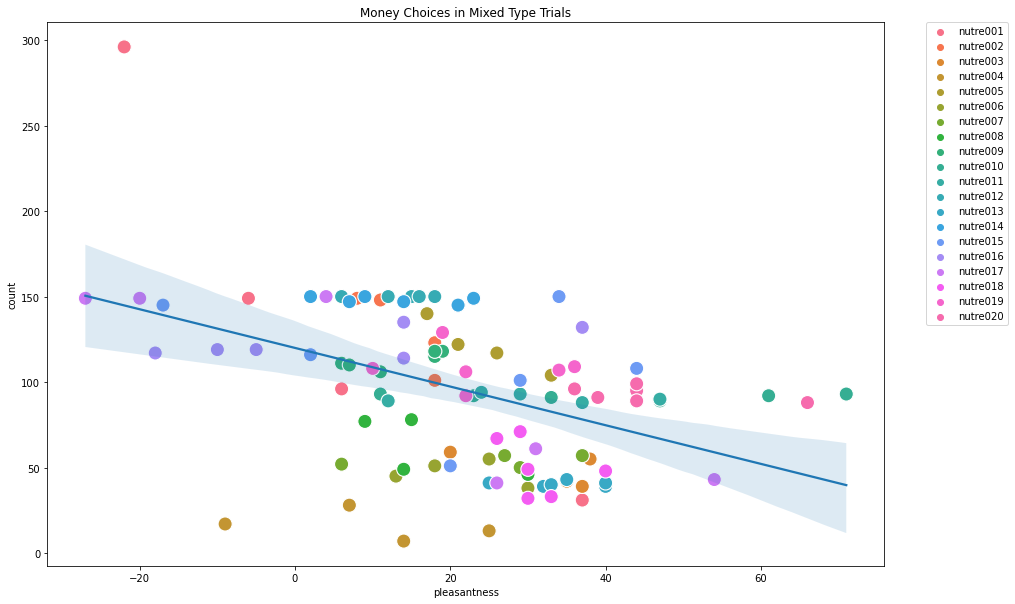

In [57]:
fig, ax = plt.subplots(figsize= [15,10])
sns.scatterplot(data = choice_count_df[choice_count_df['choice'] ==1], x = _v_.pleasanteness_colName, y = 'count', hue = 'User', ax = ax,  s=200)
sns.regplot(data = choice_count_df[choice_count_df['choice'] ==1], x = _v_.pleasanteness_colName, y = 'count', scatter = False, ax = ax)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title('Money Choices in Mixed Type Trials');

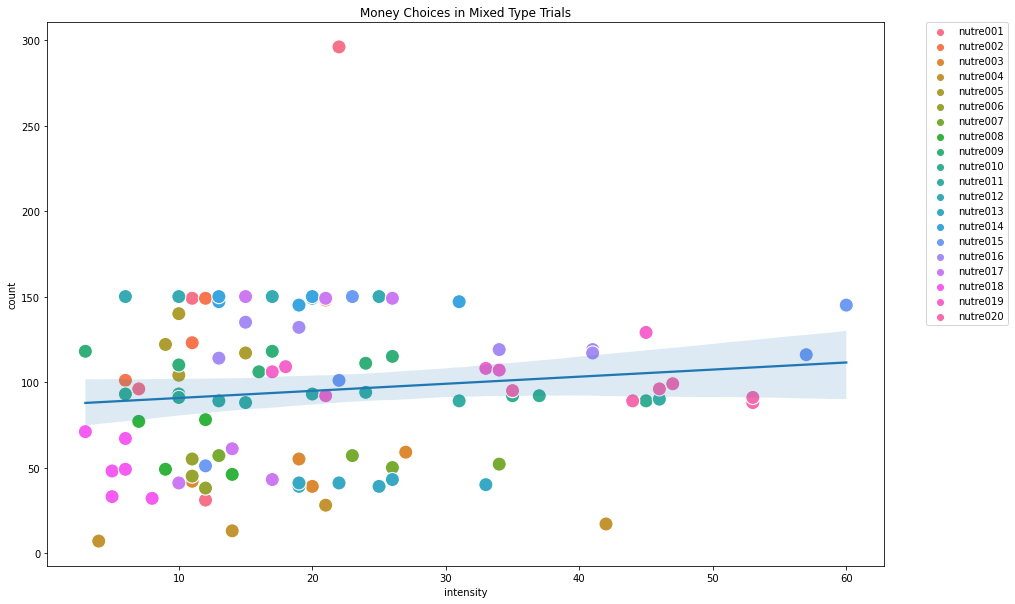

In [58]:
fig, ax = plt.subplots(figsize= [15,10])
sns.scatterplot(data = choice_count_df[choice_count_df['choice'] ==1], x = _v_.intensity_colName, y = 'count', hue = 'User', ax = ax,  s=200)
sns.regplot(data = choice_count_df[choice_count_df['choice'] ==1], x = _v_.intensity_colName, y = 'count', scatter = False, ax = ax)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title('Money Choices in Mixed Type Trials');

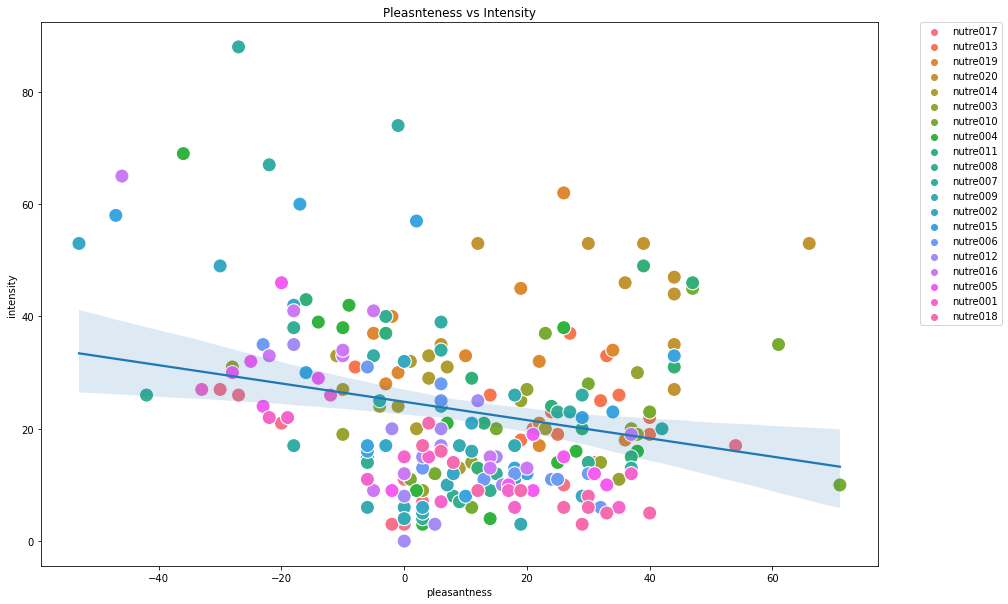

In [70]:
fig, ax = plt.subplots(figsize= [15,10])
sns.scatterplot(data = allRatings_df, x = _v_.pleasanteness_colName, y = _v_.intensity_colName, hue = 'User', ax = ax,  s=200)
sns.regplot(data = allRatings_df, x = _v_.pleasanteness_colName, y =  _v_.intensity_colName, scatter = False, ax = ax)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title('Pleasnteness vs Intensity');